# **Data preprocessing, EDA and visualization** 📊🧮

This notebook includes a series of steps to load, clean, and analyze a dataset. We will:

1. Loading the survey data.
   
2. Analyzing missing values.
   
3. Handling missing values.
   
4. Performing exploratory data analysis (EDA).
   
5. Visualizing the most interesting findings.
   
6. Providing selection based on rows and/or columns (if needed)

### **Loading the survey data** 📥

First, we'll load the data from the CSV file into a pandas DataFrame and display the first few rows to understand the structure of the dataset.

- We'll load the CSV file into pandas DataFrame using `pd.read_csv(file_path)`.
  
- Then we'll use `head(3)` to display the first 3 rows of the data.

In [ ]:
import pandas as pd

# Path to the file
file_path = r'D:\Users\Desktop\ProjektAnalitiks\data\01_Raw\01_DataCompetencySurvey.csv'

# Loading the data
data = pd.read_csv(file_path)

# Displaying the first three rows
print("Initial data:")
print(data.head(3))

Initial data:
   ID  Godzina rozpoczęcia   Godzina ukończenia Adres e-mail  Nazwa  \
0   1  2024-03-05 15:25:52  2024-03-05 15:33:04    anonymous    NaN   
1   2  2024-03-05 15:29:46  2024-03-05 15:35:02    anonymous    NaN   
2   3  2024-03-05 15:16:30  2024-03-05 15:37:17    anonymous    NaN   

   Czas ostatniej modyfikacji  \
0                         NaN   
1                         NaN   
2                         NaN   

  Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.  \
0  Projekt "data" będący mobilną stacją benzynową...                                                    
1                                                NaN                                                    
2                                                NaN                                                    

      W jaki sposób chcesz uczestniczyć w Community?  Programming: R  \
0  Chcę uczestniczyć w projekcie data i organizow...             2.0   
1  

Now let's try checking basic statistics of loaded data.

In [ ]:
data.describe()

,ID,Nazwa,Czas ostatniej modyfikacji,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",...,Współpraca z administracją UEW,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
count,67.000000,0.0,0.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,34.000000,NaN,NaN,1.847458,2.593220,1.305085,1.983051,1.372881,1.457627,1.508475,...,1.400000,1.733333,1.483333,1.050000,1.633333,1.216667,1.333333,1.233333,1.416667,1.083333
std,19.485037,NaN,NaN,1.047387,0.697746,1.192711,1.252467,1.230339,1.222237,1.072748,...,0.960226,1.147830,1.016669,0.909926,0.956098,0.922261,0.985775,0.908839,0.869281,0.869281
min,1.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,NaN,NaN,1.000000,2.000000,0.000000,1.500000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.750000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.750000
50%,34.000000,NaN,NaN,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,50.500000,NaN,NaN,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,2.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,67.000000,NaN,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000


Out of 45 columns only 38 were taken into consideration, which might point to the fact that the other 7 columns are non-numeric.

---

### **Analyzing missing values** 🔎

Next, we'll check which columns have missing values and how many missing values there are. This step helps us understand the completeness of the data and plan for handling any missing values.

This step is crucial for understanding the quality of the dataset and planning how to handle any gaps in the data. We will explore the following:

- Simple overview of missing values to identify which columns have missing values and how many missing values there are in each column,
  
- Percentage of missing values for each column to get a better sense of the data quality,

- Visualizing missing data to get a more intuitive understanding of where the missing values are located.

Let's now check which rows we should consider removing from the dataset.

In [ ]:
# Information about the data
# print("\nData info:")
# print(data.info())

# Checking for non-null values
non_null_values = data.notnull().sum()
print("\nNon-null values:")
# Sorting non-null values in ascending order
non_null_values_sorted = non_null_values.sort_values(ascending=True)

# Print only the top 10 non-null values
print(non_null_values_sorted.head(10))



Non-null values:
Nazwa                                                                                                   0
Czas ostatniej modyfikacji                                                                              0
Jeżeli pominięto branżę, na której się znasz dopisz ją:                                                10
Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:                            13
Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.    19
Area: Computer Vision                                                                                  59
Area: NLP                                                                                              59
Area: Classical ML (Clustering, Regression, Classification)                                            59
BI: Tableau                                                                                            59
BI: PowerBI                 

- `data.info()` - provides a concise summary of the DataFrame, including the number of non-null values in each column.

- `data.notnull()` - creates a DataFrame with the same structure as data, where each value is True if it is non-null and False otherwise.

- `.sum()` is then called on this DataFrame to count the non-null values in each column.

Based on above code sample we see that there are 5 extraordinarily empty columns.

### **Percentage of missing values** °/•

To understand the extent of missing values, we calculate their percentage for each column and sort them accordingly.

In [ ]:
# Calculate the percentage of missing values
missing_percentage = (non_null_values_sorted / len(data)) * 100

# Print the percentage of missing values
print("\nPercentage of missing values:")

# Sort the missing percentages in ascending order and filter out non-missing values
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=True)

# Print the top 10 values
top_5_missing_percentage = missing_percentage_sorted.head()
print(top_5_missing_percentage)



Percentage of missing values:
Jeżeli pominięto branżę, na której się znasz dopisz ją:                                                14.925373
Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:                            19.402985
Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.    28.358209
Front End: (HTML, JavaScript, CSS)                                                                     88.059701
Programming: R                                                                                         88.059701
dtype: float64


- `missing_values / len(data)` - divides the number of missing values by the total number of rows to get the proportion of missing values.

- `*100` - converts the proportion to a percentage

### **Visualizing missing data** 🕵️‍♀️

Visualizations can help us quickly understand the distribution of missing values in the dataset. We will use a heatmap to visualize missing data.

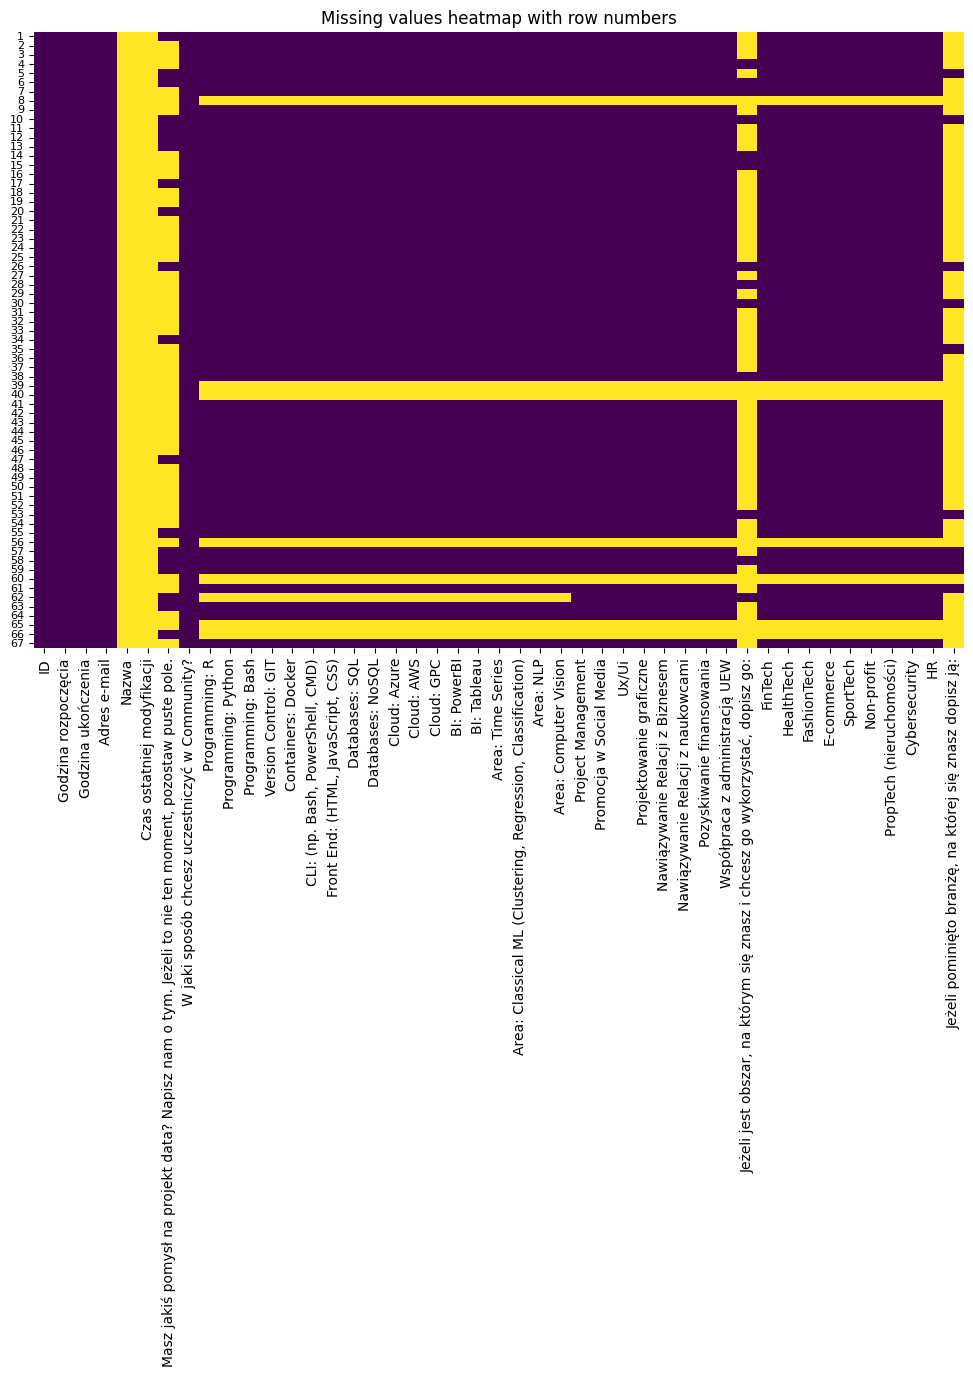

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing missing values using a heatmap with row numbers
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=(data.index + 1), annot=False)
plt.yticks(fontsize=8)
plt.title('Missing values heatmap with row numbers')
plt.show()

### **Seaborn & matplotlib formula explaination** 🐳

`data.isnull()` - creates a DataFrame of the same shape as data with True for missing values and False for non-missing values.

`cbar=False` - hides the color bar to keep the plot clean.

`cmap='viridis'` - sets the color map to 'viridis', which is visually appealing and helps distinguish between missing and non-missing values.

`yticklabels=False` - hides the y-axis labels to reduce clutter.

`yticks(fontsize=8)` - lessens the Y axis font size to 8 for uncluttering.

After analyzing the missing values in the dataset, we can draw several important conclusions that will guide our data cleaning and preprocessing steps. Summarizing of our findings and the corresponding conclusions:

- Using `data.info()`, we observed that some columns have missing values, which are represented as NaN in the DataFrame.
The *missing_values* series indicates which columns have missing values and how many there are in each column.

- By calculating the percentage of missing values for each column, we can assess the extent of the missing data.

If a column has a very high percentage of missing values, it might be considered for removal, as it may not provide much useful information.
Conversely, columns with low percentages of missing values might be good candidates for imputation, where we fill in the missing values with appropriate substitutes (e.g., mean, median, mode).

- The heatmap provides a visual representation of the missing data, showing us the distribution of missing values across the dataset.
This visual aid helps us quickly identify any patterns in the missing data, such as whether the missing values are randomly distributed or if there are entire rows or columns with missing data.

Based on the analysis of missing values, we can conclude the following:

- Columns with a high percentage of missing values may need to be removed if they do not contribute significantly to the analysis.

- Columns with a low percentage of missing values can be imputed with the mean, median, or mode, depending on the nature of the data.

- If the missing values are randomly distributed, simple imputation methods may suffice.

- If there are patterns (e.g., missing values clustered in specific rows or columns), we may need to investigate further to understand the reasons behind the missing data and choose appropriate handling methods.

Based on the visual represantion of missing values (heatmap) we can see that the most empty columns are:

- `Nazwa` (name) - **100% missing values** - 0 values
  
- `Czas ostatniej modyfikacji` (last modified) - **100% missing values** - 0 values
  
- `Jeżeli pominięto branżę, na której się znasz dopisz ją:` - **85,07% missing values** - 10 values
  
- `Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:` - **80,6% missing values** - 13 values
 
- `Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.` - **71,64% missing values** - 19 values

All these fields are non-numeric data, which is harder to analyze and doesn't contribute much to the overall picture, so I decided to drop them from the dataset in the later stage of this analysis.

---

Now we will obtain information about **top 10 rows**, which introduce the largest portion of missing data.

In [ ]:
# Identifying top 10 rows with the most missing values

missing_values_count = data.isnull().sum(axis=1)
rows_with_most_missing = missing_values_count.sort_values(ascending=False).head(10)

print(rows_with_most_missing)

55    40
64    40
7     40
39    40
38    40
59    40
65    39
61    21
1      5
48     5
dtype: int64


## **Handling missing values**

### Removing columns with high percentage of missing values ⛔

Knowing the number of rows and columns and specific rows with the most missing values we can now specify the threshold. If any row has more than a specified threshold (25%) of missing values, we might consider removing it.

In [ ]:
# Defining the threshold for missing values (our threshold will be 25%)
threshold = 25

# Calculating the percentage of missing values in each row
missing_percentage = data.isnull().mean(axis=1) * 100

# Identifying rows where missing values exceed the threshold
rows_above_threshold = data[missing_percentage > threshold]

# Printing rows that have missing values exceeding the threshold
print("\nRows with missing values exceeding 25% threshold:")
print(rows_above_threshold)

# If you want to drop these rows from the original dataset
data_cleaned = data[missing_percentage <= threshold]


Rows with missing values exceeding 25% threshold:
    ID  Godzina rozpoczęcia   Godzina ukończenia Adres e-mail  Nazwa  \
7    8  2024-03-05 15:50:55  2024-03-05 15:52:28    anonymous    NaN   
38  39  2024-03-06 19:15:27  2024-03-06 19:15:56    anonymous    NaN   
39  40  2024-03-06 19:48:41  2024-03-06 19:48:50    anonymous    NaN   
55  56  2024-03-15 07:11:47  2024-03-15 07:12:01    anonymous    NaN   
59  60  2024-03-25 15:50:03  2024-03-25 15:50:19    anonymous    NaN   
61  62  2024-03-26 09:52:57  2024-03-26 09:57:41    anonymous    NaN   
64  65  2024-04-08 10:31:25  2024-04-08 10:32:10    anonymous    NaN   
65  66  2024-04-08 21:45:20  2024-04-08 21:46:43    anonymous    NaN   

    Czas ostatniej modyfikacji  \
7                          NaN   
38                         NaN   
39                         NaN   
55                         NaN   
59                         NaN   
61                         NaN   
64                         NaN   
65                         N

After this action performed, we deleted 8 rows and now have 59 rows of more useful data instead of 67.

---

Now let's drop some irrelevant columns. As mentioned before, we will drop columns with the biggest number of empty values. In this case, we observed 5 outstandingly empty columns with over 70% of empty values.

In [ ]:
# Columns to drop based on the missing percentage
columns_to_drop = [
    'Nazwa',
    'Czas ostatniej modyfikacji',
    'Jeżeli pominięto branżę, na której się znasz dopisz ją:',
    'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:',
    'Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.'
]

# Dropping the specified columns from the cleaned dataset
data_cleaned_dropped = data_cleaned.drop(columns=columns_to_drop)

# Checking the size of the cleaned dataset after dropping columns
dataset_size = data_cleaned_dropped.shape

# Display the size of the cleaned dataset
print("Number of rows:", dataset_size[0])
print("Number of columns:", dataset_size[1])

# Display the first few rows of the updated dataset to confirm the columns are dropped
print(data_cleaned_dropped.head(2))

Number of rows: 59
Number of columns: 40
   ID  Godzina rozpoczęcia   Godzina ukończenia Adres e-mail  \
0   1  2024-03-05 15:25:52  2024-03-05 15:33:04    anonymous   
1   2  2024-03-05 15:29:46  2024-03-05 15:35:02    anonymous   

      W jaki sposób chcesz uczestniczyć w Community?  Programming: R  \
0  Chcę uczestniczyć w projekcie data i organizow...             2.0   
1                 Chcę uczestniczyć w projekcie data             3.0   

   Programming: Python  Programming: Bash  Version Control: GIT  \
0                  3.0                3.0                   4.0   
1                  3.0                1.0                   3.0   

   Containers: Docker  ...  Współpraca z administracją UEW  FinTech  \
0                 3.0  ...                             2.0      3.0   
1                 2.0  ...                             1.0      2.0   

   HealthTech  FashionTech  E-commerce  SportTech  Non-profit  \
0         2.0          3.0         3.0        3.0         2.0   
1  

After cleaning the dataset there are no missing values left.

Let's compare two datasets, before and after resizing.

In [ ]:
# Checking the size of the original dataset
original_dataset_size = data.shape

# Display the size of the original dataset
print("Number of rows:", original_dataset_size[0])
print("Number of columns:", original_dataset_size[1])

# Checking the size of the original dataset
data_cleaned_dropped = data_cleaned_dropped.shape

# Display the size of the original dataset
print("New number of rows:", data_cleaned_dropped[0])
print("New number of columns:", data_cleaned_dropped[1])


Number of rows: 67
Number of columns: 45
New number of rows: 59
New number of columns: 40


As we see, the dataset shrinked a bit. In the next step I will save this file locally and put it in a `02_Interim` data folder.

In [ ]:
# Ensuring that data_cleaned is defined correctly as a df
if isinstance(data_cleaned_dropped, pd.DataFrame):
    print("data_cleaned is a DataFrame.")
else:
    print("data_cleaned is not a DataFrame. Please check your variable assignment.")

# Columns to drop
columns_to_drop = [
    'Nazwa',
    'Czas ostatniej modyfikacji',
    'Jeżeli pominięto branżę, na której się znasz dopisz ją:',
    'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:',
    'Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.'
]

# Dropping specified columns from the cleaned dataset
data_cleaned_dropped = data_cleaned.drop(columns=columns_to_drop)

# Confirming the DataFrame type
if isinstance(data_cleaned_dropped, pd.DataFrame):
    print("data_cleaned_dropped is a DataFrame.")
else:
    print("data_cleaned_dropped is not a DataFrame. Please check the drop operation.")

# Save the cleaned and updated dataset to a CSV file
output_file_path = r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\dropped_rows_columns.csv'
data_cleaned_dropped.to_csv(output_file_path, index=False)

print(f"Dataset saved to {output_file_path}")


data_cleaned is not a DataFrame. Please check your variable assignment.
data_cleaned_dropped is a DataFrame.
Dataset saved to D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\dropped_rows_columns.csv


Now the dataset is exported successfully on my local machine.

---

## **Exploratory data analysis** ⚛

In this section I will cover exploratory data analysis techniques.

In [ ]:
# Importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings as wr 
wr.filterwarnings('ignore') 

# Loading the dataset
file_path = r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\dropped_rows_columns.csv'
cleaned = pd.read_csv(file_path)

After importing necessary libraries and cleaned .csv file from the previous part, we can now start with basic data exploration and later on go into details.

In [ ]:
# Basic information about the dataset
print("Data info:")
print(cleaned.info())

# Basic statistics of the dataset
print("\nBasic statistics:")
print(cleaned.describe(include='all'))

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 40 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ID                                                           59 non-null     int64  
 1   Godzina rozpoczęcia                                          59 non-null     object 
 2   Godzina ukończenia                                           59 non-null     object 
 3   Adres e-mail                                                 59 non-null     object 
 4   W jaki sposób chcesz uczestniczyć w Community?               59 non-null     object 
 5   Programming: R                                               59 non-null     float64
 6   Programming: Python                                          59 non-null     float64
 7   Programming: Bash                                            59 non-nul

Checking for missing values:

In [ ]:
# Checking for missing values
missing_values = cleaned.isnull().sum()
print("\nMissing values:")
print(missing_values[missing_values > 0])


Missing values:
Series([], dtype: int64)


Empty series - no missing values as shown above.

I will clear some leftover columns from the dataset that I won't use.

In [ ]:
# Reloads the latest dataset
data = pd.read_csv(r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\cleaned_dataset.csv')

# Dropping columns that contain 'Godzina' or 'Adres' in their names and other specified columns
columns_to_drop = [col for col in data.columns if 'Godzina' in col or 'Adres' in col] + ['Nazwa', 'Czas ostatniej modyfikacji']
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')

# Saving the cleaned dataset to a CSV file
cleaned_file_path = r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

From categorical data we can extract the type of preferred activity in community.

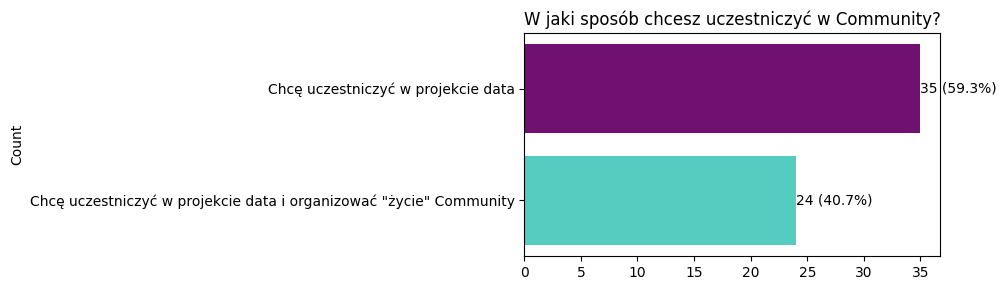

In [ ]:
# Plotting the count plot for the categorical column with count and percentages
plt.figure(figsize=(10, 3))
ax = sns.countplot(y=cleaned["W jaki sposób chcesz uczestniczyć w Community?"], order=cleaned["W jaki sposób chcesz uczestniczyć w Community?"].value_counts().index, palette=["purple", "turquoise"])
plt.title("W jaki sposób chcesz uczestniczyć w Community?", fontsize=12)
plt.xlabel('')
plt.ylabel('Count', fontsize=10)

# Adding count and percentage labels
total = len(cleaned["W jaki sposób chcesz uczestniczyć w Community?"])
for p in ax.patches:
    count = int(p.get_width())
    percentage = f'{100 * p.get_width() / total:.1f}%'
    label = f'{count} ({percentage})'
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(label, (x, y), ha='left', va='center')

plt.tight_layout()
plt.show()


From the graph above we can conclude that almost **60%** of respondents are only interested in participation in data project, and the rest (**~40%**) desires to both participate in data project and organize community life. We are taking into consideration only those respondents that want to be active members of this community, filtering out 8 respondents who declared passive membership.

### **Distribution analysis** 📊

After last cleaning procedure I will create box-plots and histograms to visualize distribution among different column values.

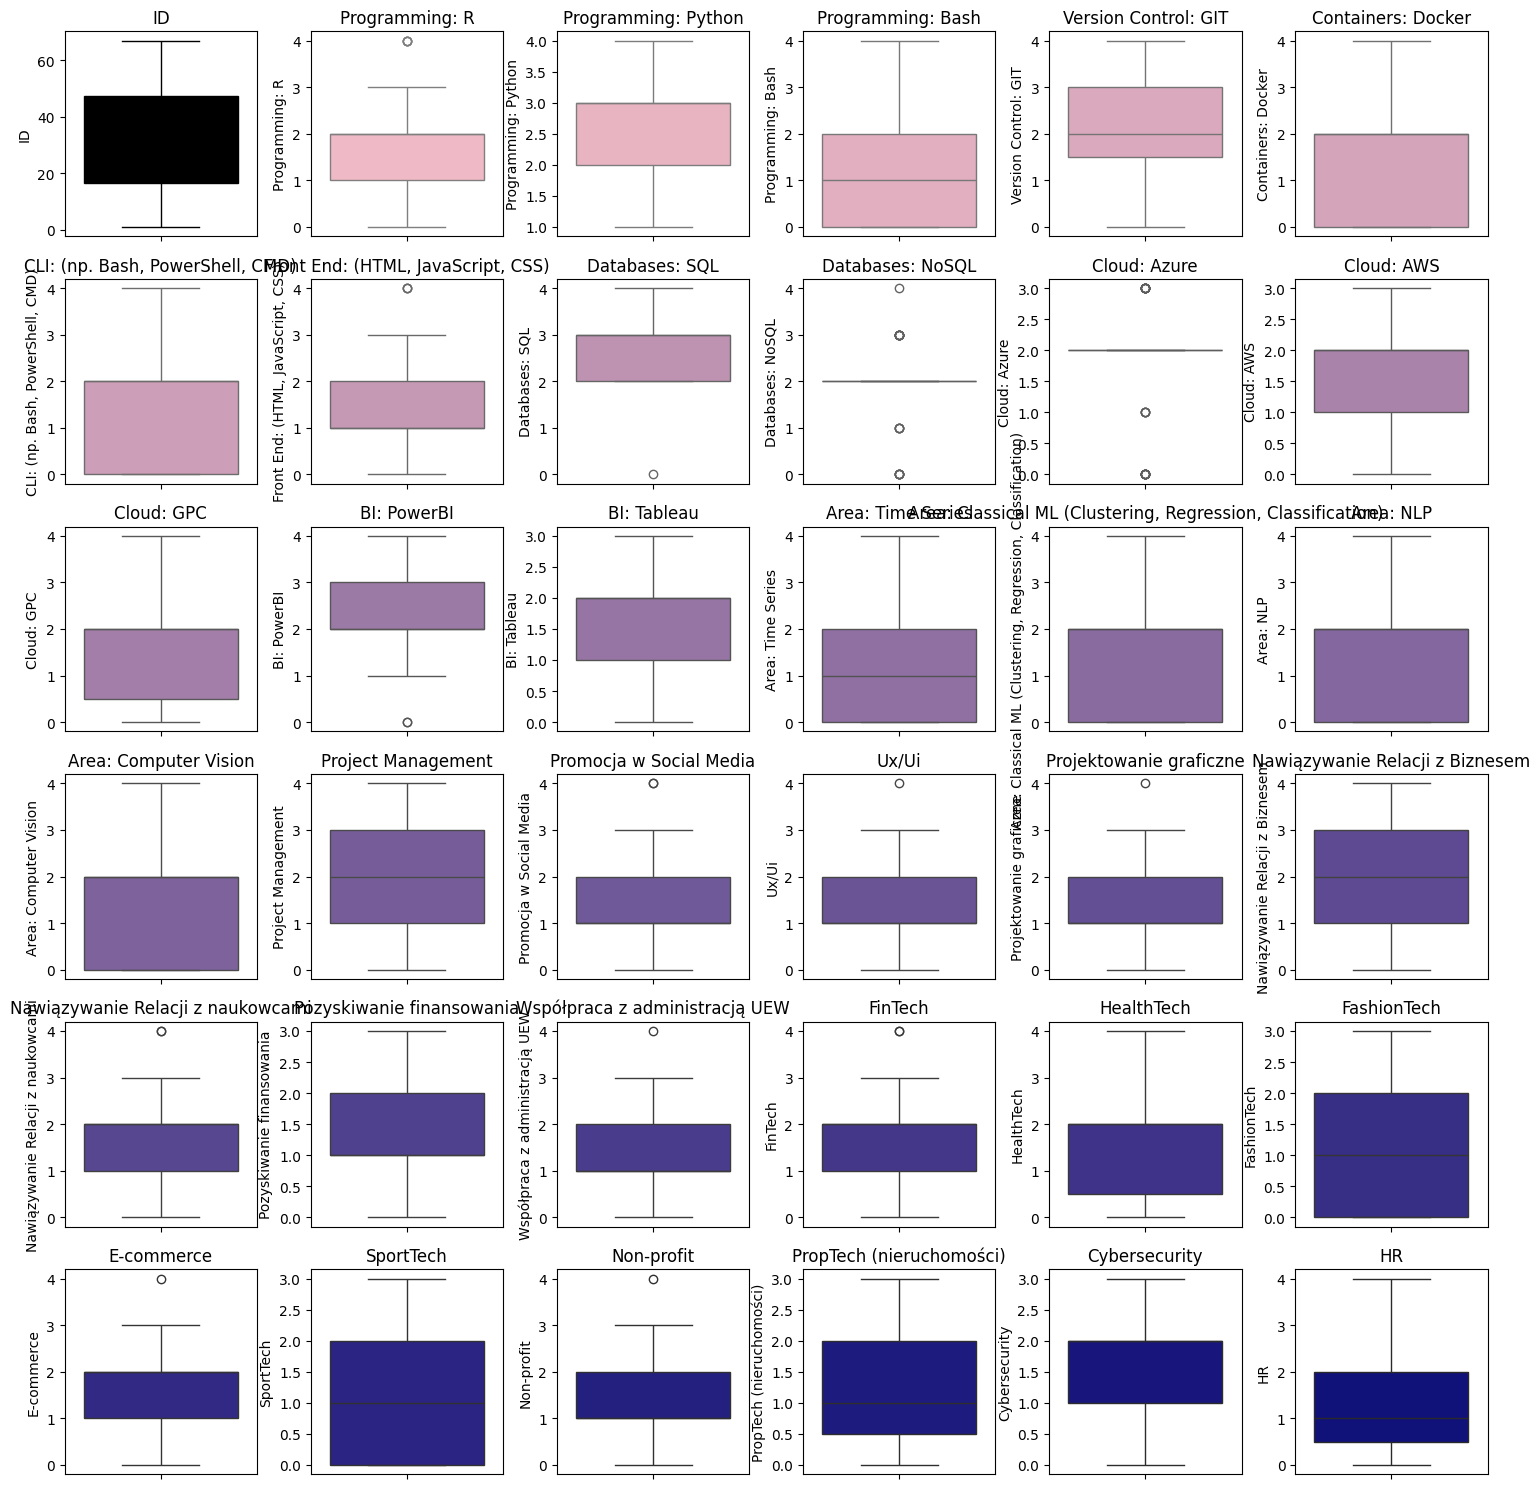

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import math

# Generates gradient colors
def gradient_colors(start_color, end_color, n_colors):
    cmap = LinearSegmentedColormap.from_list('custom_gradient', [start_color, end_color], N=n_colors)
    return [cmap(i / (n_colors - 1)) for i in range(n_colors)]

# Identifying numerical columns again after column removal
numerical_columns = cleaned.select_dtypes(include=['float64', 'int64']).columns

# Contrasting gradient from pale pink to vivid blue
num_columns = len(numerical_columns)
gradient_colors_list = gradient_colors('#FFB6C1', '#00008B', num_columns)

# Assigning gradient colors to num columns
colors = {col: gradient_colors_list[i] for i, col in enumerate(numerical_columns)}

# Including 'ID' with the color black
colors['ID'] = 'black'

# Setting the number of rows and columns for the main grid
num_rows = 6
num_cols = 6

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten axes array
axes = axes.flatten()

# Generating box plots with colors
for i, column in enumerate(numerical_columns):
    color = colors.get(column, 'steelblue')  # Default color if column not in colors
    sns.boxplot(y=cleaned[column].dropna(), ax=axes[i], color=color)  # Drops NA values for plotting
    axes[i].set_title(column)

# Removing any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout
plt.tight_layout()
plt.show()


##### According to the set of boxplots above I can see that there is a strong represantation of people with high Python and SQL skills, covered with Project Management interests and some Git version control knowledge. Dispersion for Python is a bit more diffused, which means that differenced in skills are more differentiated in case of Python.

##### To confirm these assumptions I will now generate combo plots (histogram plots with line trends) for each column containing numerical values and split them by categories with colours.

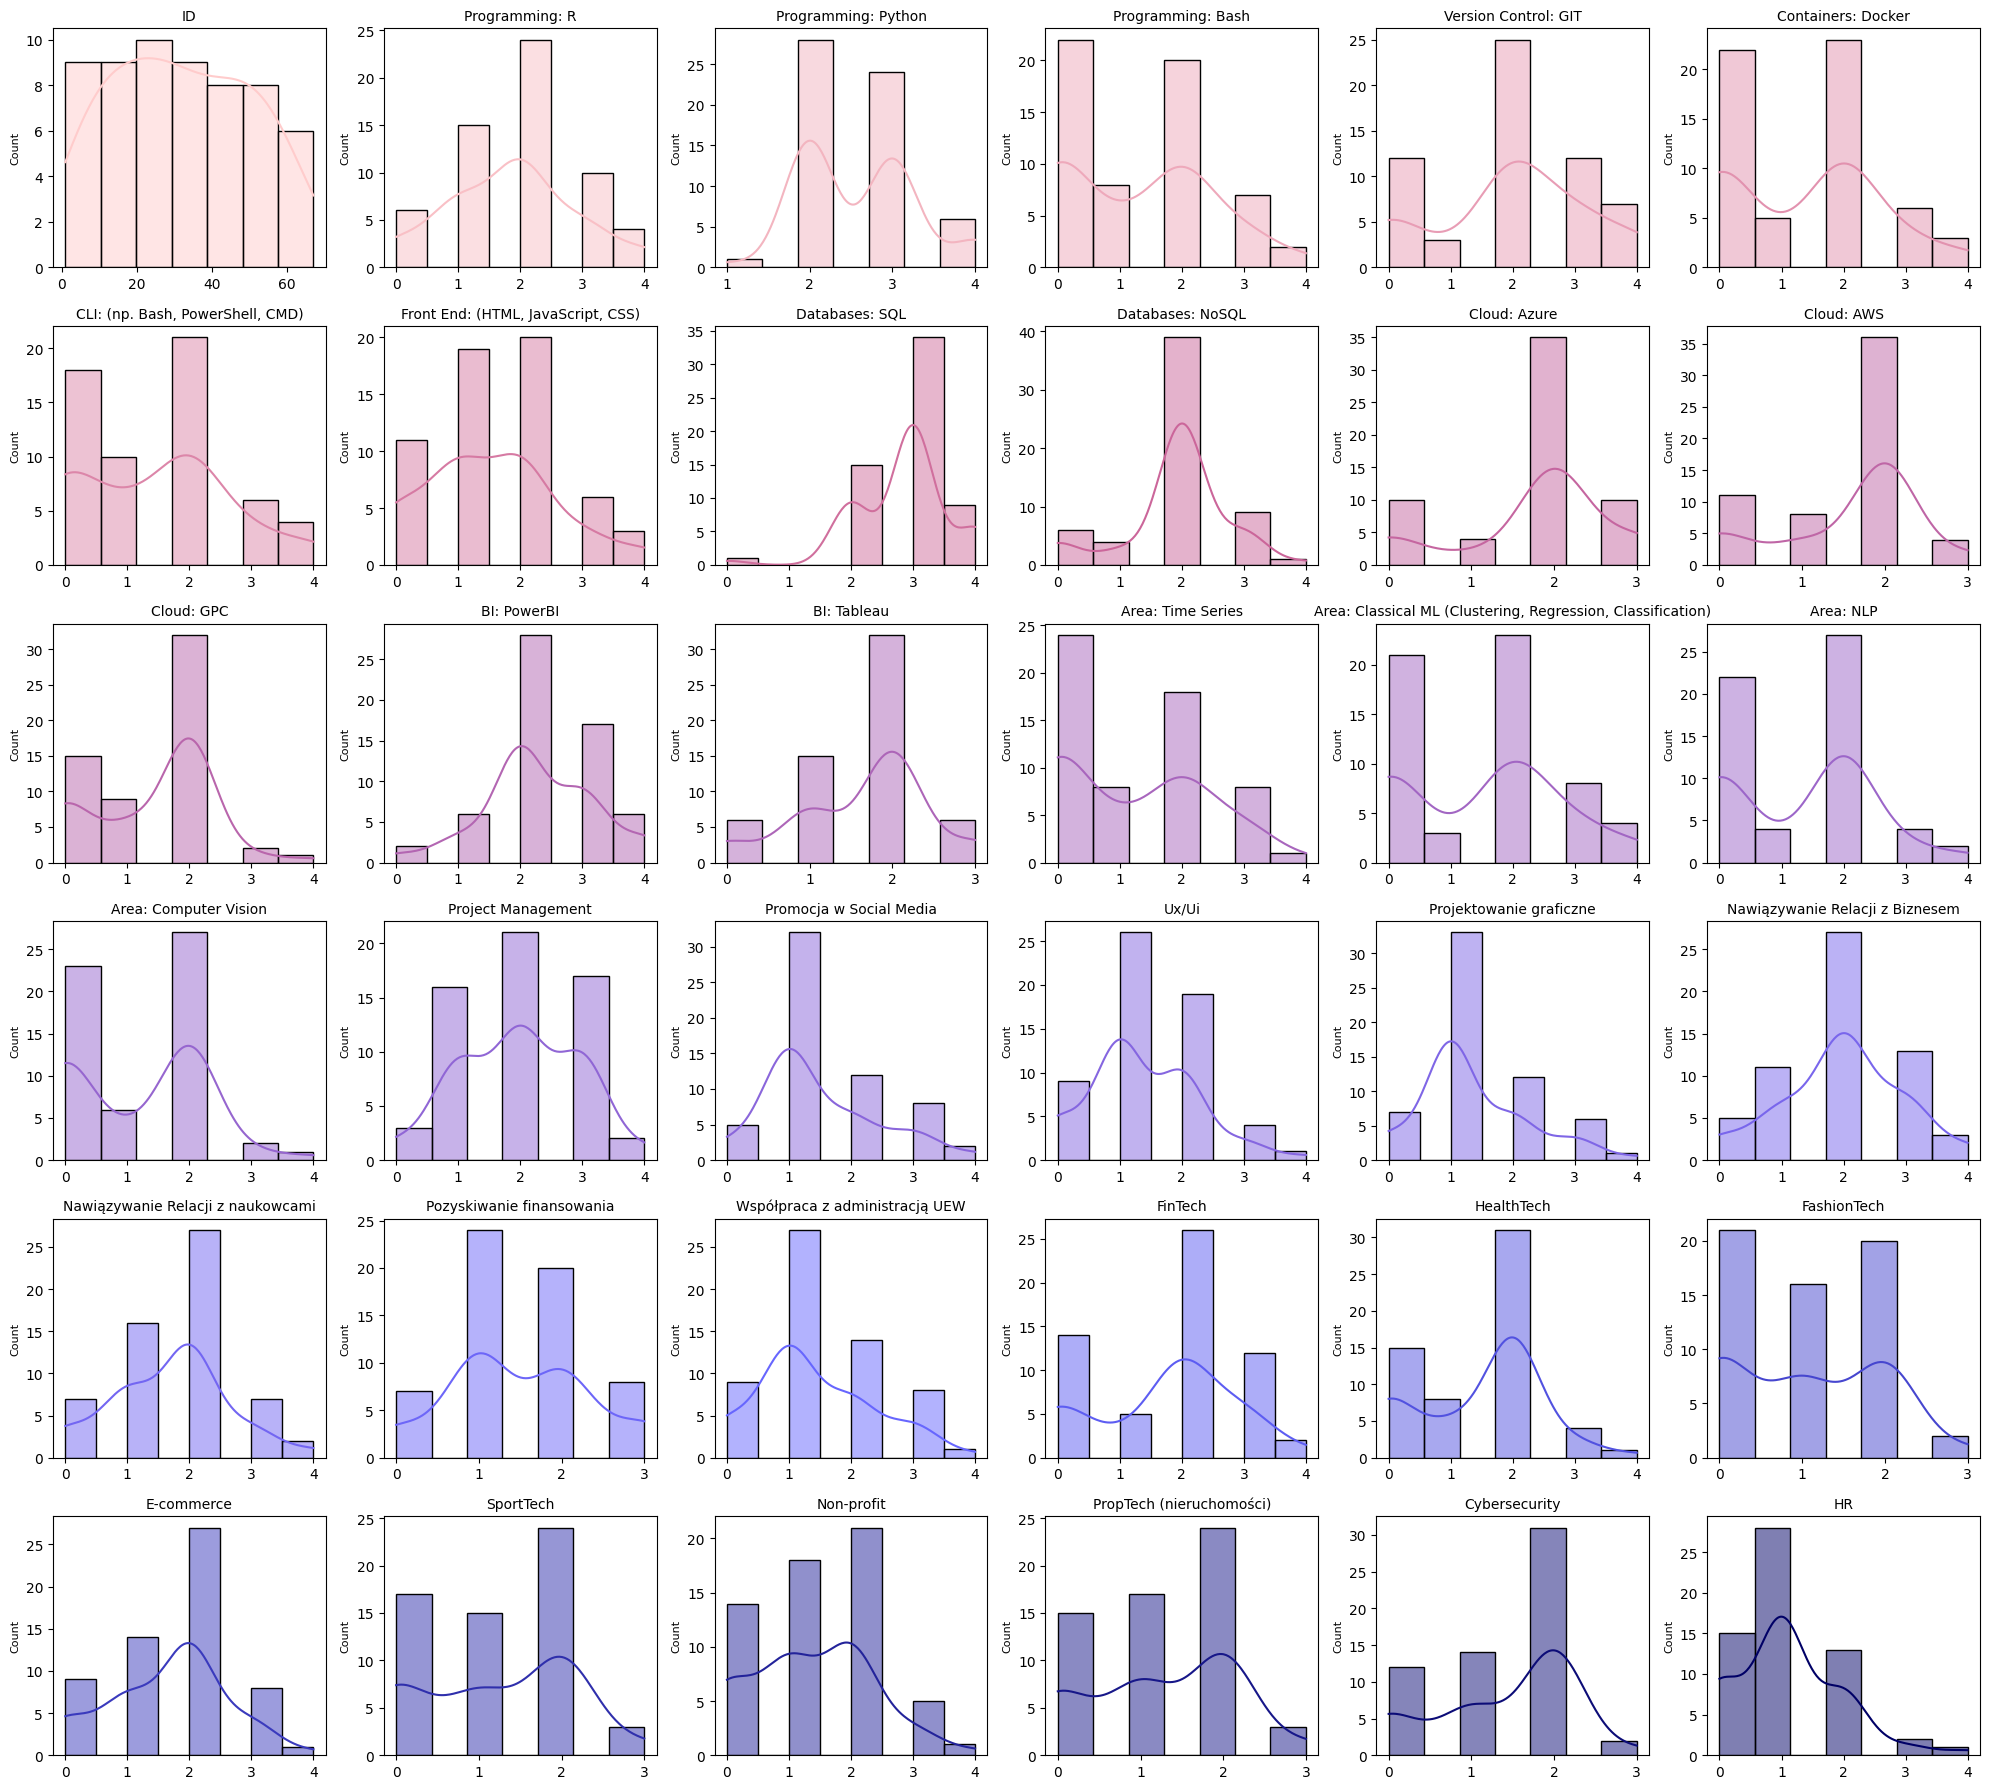

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Generate a gradient color map
colors = ['#FFCCCC', '#CC6699', '#9966CC', '#6666FF', '#000066']
n_bins = len(numerical_columns)  # Number of bins for the gradient
cmap_name = 'custom_gradient'
gradient_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Getting colors
gradient_colors = [gradient_cmap(i) for i in range(n_bins)]

# Mapping from columns to gradient colors
column_colors = dict(zip(numerical_columns, gradient_colors))

# Identifying numerical columns
numerical_columns = cleaned.select_dtypes(include=['float64', 'int64']).columns

# Number of plots
num_plots = len(numerical_columns)

# Calculating the number of rows needed
num_cols = 6
num_rows = (num_plots + num_cols - 1) // num_cols

# Plotting histograms for numerical variables and grouping by skill types with gradient colors
plt.figure(figsize=(20, num_rows * 3))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    color = column_colors.get(col, 'indigo')  # Default color for ungrouped columns
    sns.histplot(cleaned[col], kde=True, color=color)
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=8)

plt.tight_layout()
plt.show()


##### **Conclusion**: After generating histograms with line graph for each column, it is more visible that respondents are the most proficient in **SQL databases**. 
##### The least proficiency is observed in **HR** teritory, in **social media promotion** and **creating visuals**.

## **More advanced EDA** ⚙️

Let's apply some more advanced EDA techniques. First, let's handle the data imputation part.

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

# Loading data
file_path = r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\dropped_rows_columns.csv'
data = pd.read_csv(file_path)

# Initializing the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Applying the imputer to the numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Handling columns with all missing values
columns_with_all_missing = numerical_data.columns[numerical_data.isnull().all()].tolist()
numerical_data = numerical_data.drop(columns=columns_with_all_missing)

imputed_data = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_data.columns)

# Combining imputed numerical data with non-numerical data
data_imputed = data.copy()
data_imputed[numerical_data.columns] = imputed_data

# Re-adding columns that had all missing values, if necessary
for col in columns_with_all_missing:
    data_imputed[col] = data[col]

# Exporting the dataset to the same folder
output_path = r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\dropped_rows_columns_imputed.csv'
data_imputed.to_csv(output_path, index=False)

print(f"Dataset saved to {output_path}")

Dataset saved to D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\dropped_rows_columns_imputed.csv


Next, let's perform outlier detection using isolation forest and visualize the results.

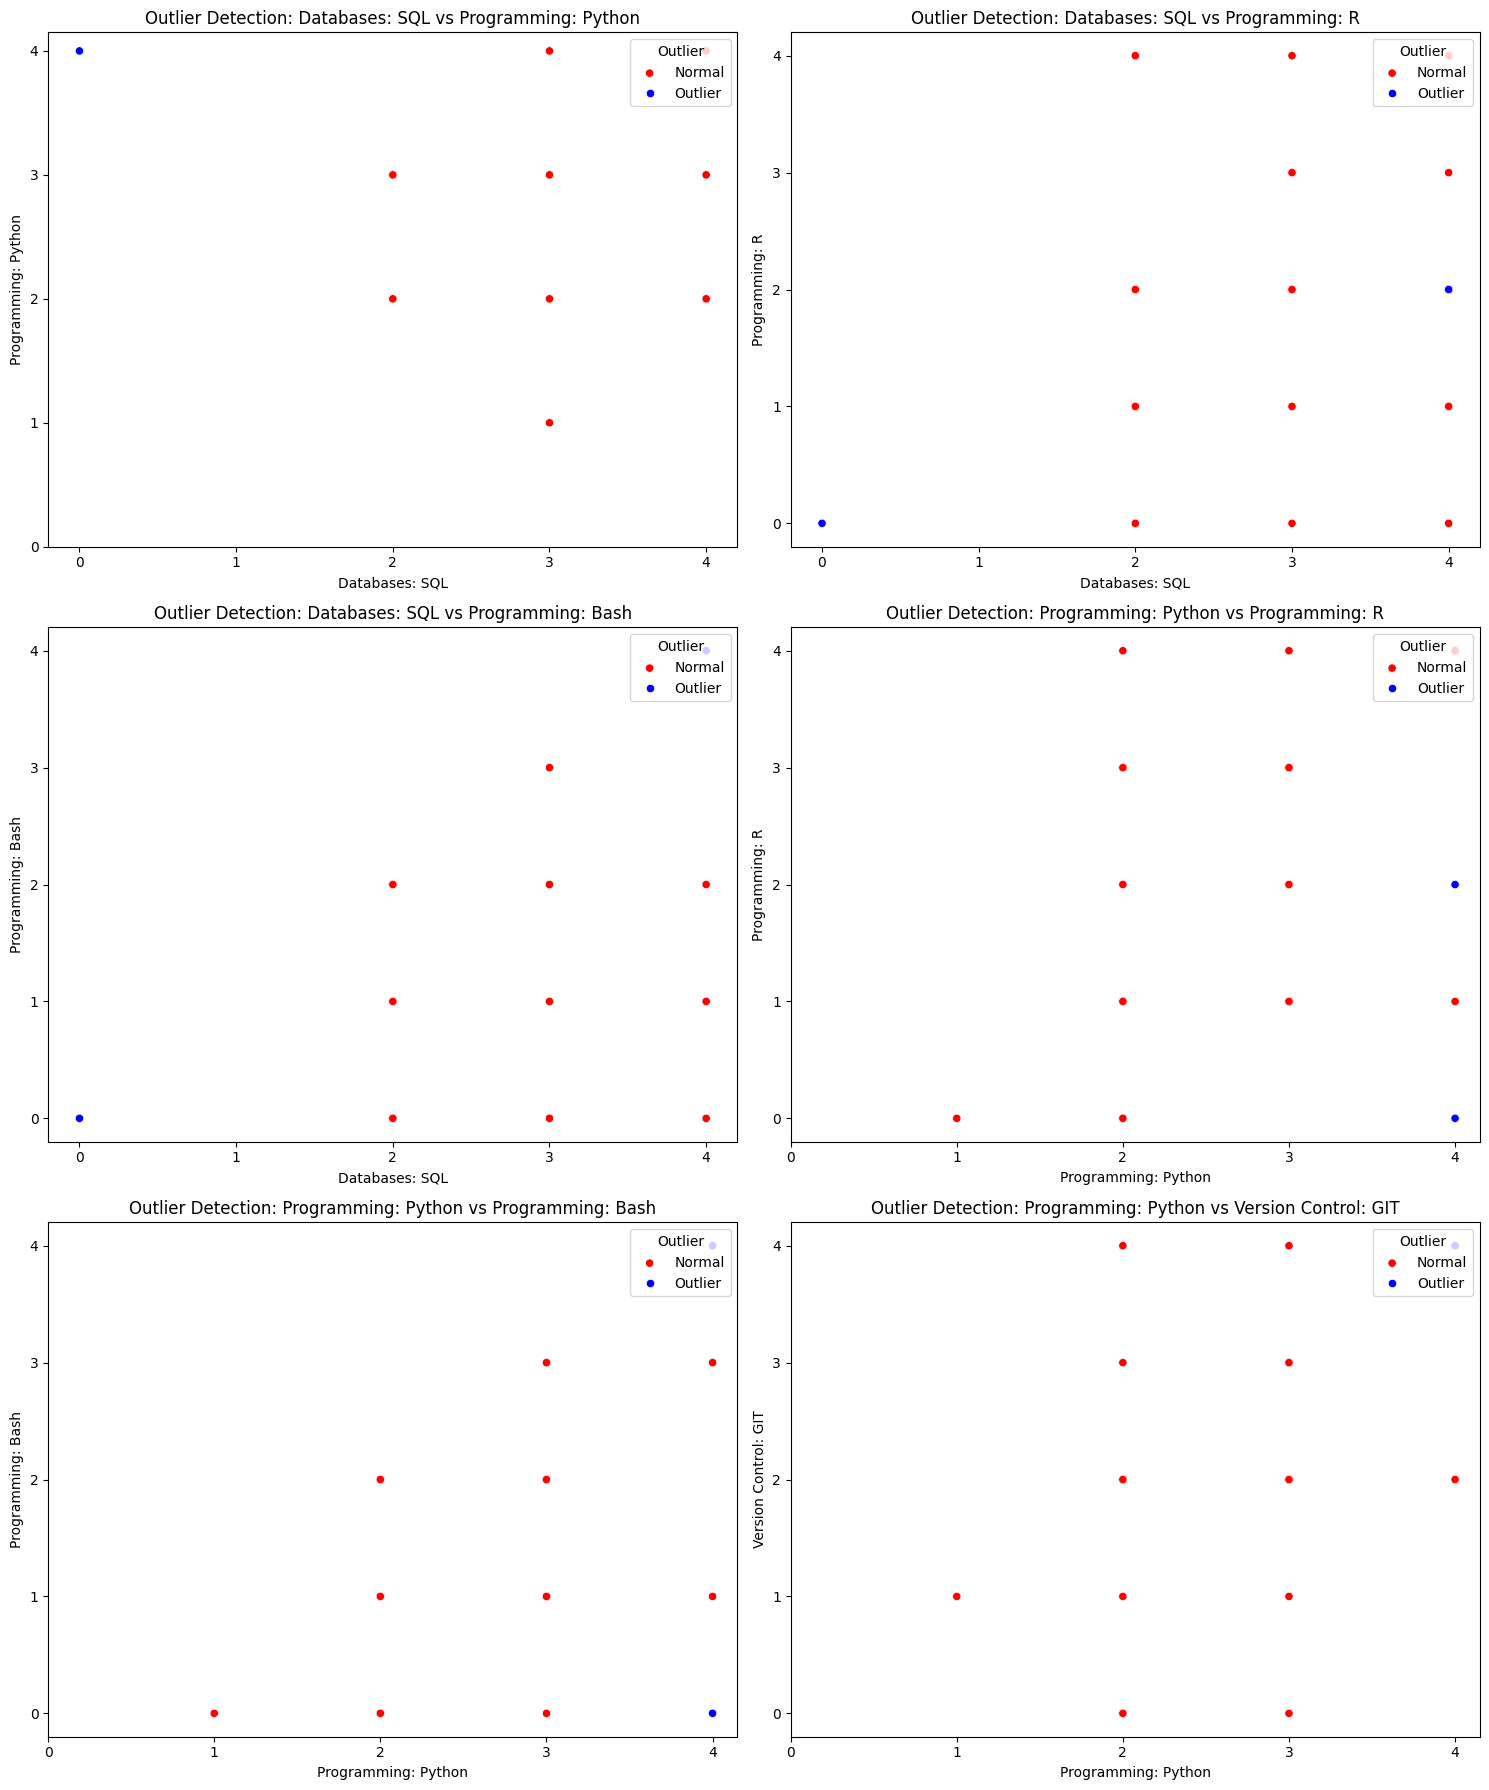

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import math
from sklearn.ensemble import IsolationForest

# Loading the dataset
file_path = r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\dropped_rows_columns_imputed.csv'
imputed_data = pd.read_csv(file_path)

# Identifying non-numeric columns in the dataset
non_numeric_columns = imputed_data.select_dtypes(exclude=['number']).columns.tolist()

# Dropping non-numeric columns from the dataset
imputed_data_hard_skills_actual_cleaned = imputed_data.drop(columns=[col for col in non_numeric_columns if col in imputed_data.columns])

# Initializing the isolation forest
iso_forest_hard_skills_actual_cleaned = IsolationForest(contamination=0.05)

# Fitting the model and predict outliers
outliers_hard_skills_actual_cleaned = iso_forest_hard_skills_actual_cleaned.fit_predict(imputed_data_hard_skills_actual_cleaned)

# Adding the outliers to the dataset
imputed_data['Outlier'] = outliers_hard_skills_actual_cleaned

# Recreating the plots without 0.5s on the axes, using only integer values
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Defining the pairs of hard skills to visualize with 'Databases: SQL' and 'Programming: Python' being primary
skill_pairs = [
    ('Databases: SQL', 'Programming: Python'),
    ('Databases: SQL', 'Programming: R'),
    ('Databases: SQL', 'Programming: Bash'),
    ('Programming: Python', 'Programming: R'),
    ('Programming: Python', 'Programming: Bash'),
    ('Programming: Python', 'Version Control: GIT')
]

# Creating scatter plots for each pair
for (skill_x, skill_y), ax in zip(skill_pairs, axes.flatten()):
    sns.scatterplot(data=imputed_data, x=skill_x, y=skill_y, hue='Outlier', palette=['blue', 'red'], ax=ax)
    ax.set_title(f'Outlier Detection: {skill_x} vs {skill_y}')
    ax.set_xlabel(skill_x)
    ax.set_ylabel(skill_y)
    ax.set_xticks(range(0, int(imputed_data[skill_x].max()) + 1))
    ax.set_yticks(range(0, int(imputed_data[skill_y].max()) + 1))
    ax.legend(title='Outlier', loc='upper right', labels=['Normal', 'Outlier'])

plt.tight_layout()
plt.show()

We can observe that:
- The outliers in these plots represent individuals who have a unique combination of skills compared to the rest of the population.

- Most individuals (blue points) have skill combinations that are similar to each other, and they cluster around common values.

- The presence of outliers across different skill pairs suggests that the dataset has a few individuals with distinctive skill profiles.

##### Now let's check correlations between different numerical values respesenting competency areas by using correlation matrix.

In [ ]:
# Dataset loading
data = pd.read_csv(r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\cleaned_dataset.csv')

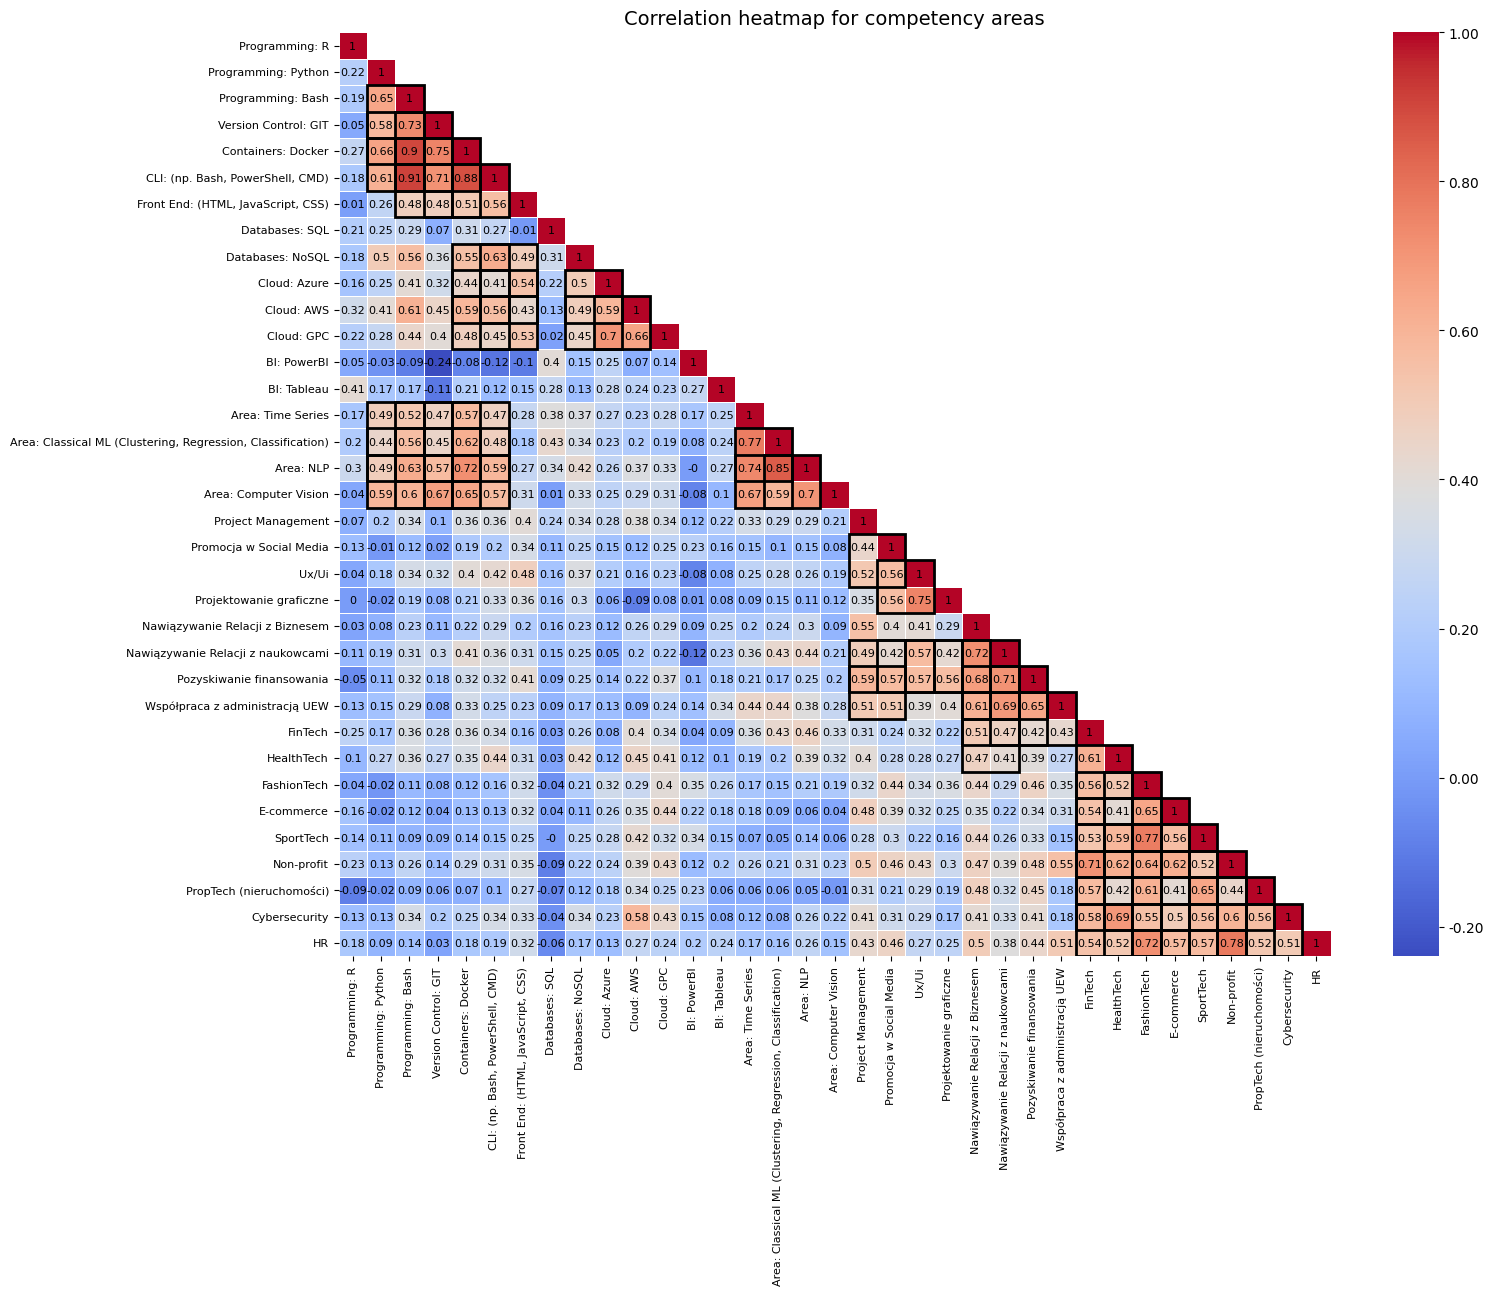

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Dataset loading
data = pd.read_csv(r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\cleaned_dataset.csv')

# Dropping the "ID" column if it exists
if 'ID' in data.columns:
    data = data.drop(columns=['ID'])

# Calculating the correlation matrix and rounding to two decimal places
correlation_matrix = data.corr(numeric_only=True).round(2)

# Custom formatter function to remove trailing zeros
def custom_formatter(x):
    if pd.isna(x):
        return ""
    return ('%.2f' % x).rstrip('0').rstrip('.')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plotting correlation heatmap without annotations and with a mask
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(correlation_matrix, mask=mask, cmap="coolwarm", linewidths=0.5, linecolor='white', annot=False, cbar_kws={'format': '%.2f'})

# Manually adding annotations with custom formatting to the lower triangle and diagonal only
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if i >= j:  # Only annotate the lower triangle and diagonal
            text = custom_formatter(correlation_matrix.iloc[i, j])
            heatmap.text(j + 0.5, i + 0.5, text,
                         ha='center', va='center', color='black', fontsize=8)

# Function to add a thick border around a cluster
def add_thick_border(heatmap, cluster_cells, color='black', linewidth=2):
    min_i = min(cell[0] for cell in cluster_cells)
    max_i = max(cell[0] for cell in cluster_cells)
    min_j = min(cell[1] for cell in cluster_cells)
    max_j = max(cell[1] for cell in cluster_cells)
    heatmap.add_patch(plt.Rectangle((min_j, min_i), max_j - min_j + 1, max_i - min_i + 1, fill=False, edgecolor=color, lw=linewidth))

# Finding clusters and drawing thick borders around them
for i in range(correlation_matrix.shape[0] - 1):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.4:
            cluster_cells = [(i, j)]
            if (correlation_matrix.iloc[i + 1, j] > 0.4 and
                correlation_matrix.iloc[i, j + 1] > 0.4 and
                correlation_matrix.iloc[i + 1, j + 1] > 0.4):
                cluster_cells.append((i + 1, j))
                cluster_cells.append((i, j + 1))
                cluster_cells.append((i + 1, j + 1))
                add_thick_border(heatmap, cluster_cells)

plt.title("Correlation heatmap for competency areas", fontsize=14)
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8, rotation=0)
plt.show()

According to the heatmap above, we see some remarkable clusters near the diagonal axis. 
- The most visible one contains of **programming stack**: Python, CLI, Bash, Git and Docker.

- The second cluster is all **Cloud** - GCP, Azure, AWS with addition of NoSQL databases.

- Third noticable cluster is connected strictly to **Data Science** - ML, NLP, Computer Vision, time series.

- Fourth cluster has **soft skills** in it and fifth has **types of industries**.

We can also observe that we don't have any negatively correlated clusters nor values.

It is time to use hierarchical clustering. To be assured of it's best results, I will apply **elbow method** to ensure about the best k-value. I will try two approaches to see which one is more accurate.

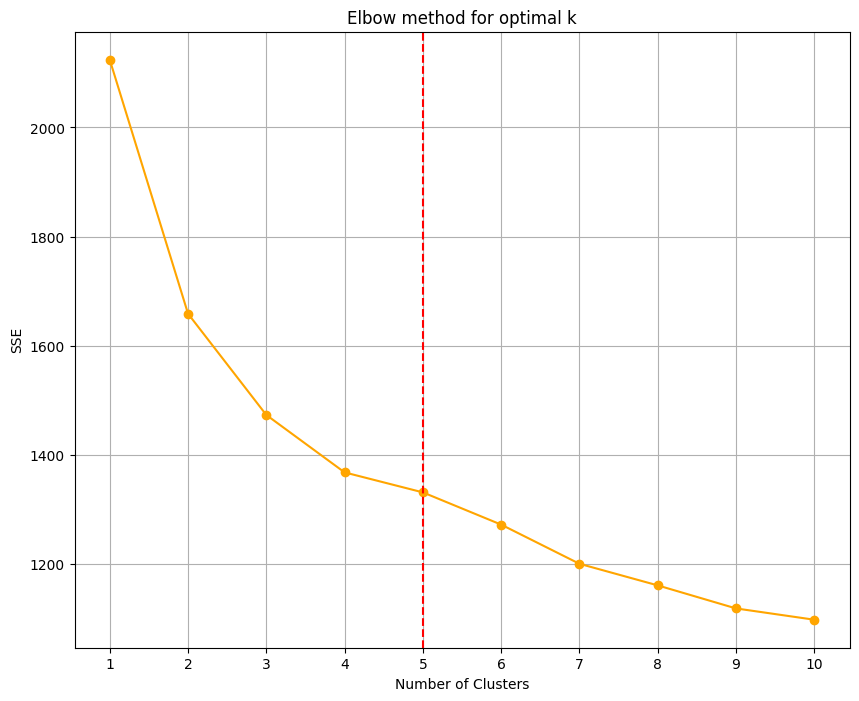

In [ ]:
# Re-importing the necessary libraries for clarity and completeness
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\cleaned_dataset.csv'
data = pd.read_csv(file_path)

# Dropping non-numeric columns for clustering
numeric_data = data.select_dtypes(include=[np.number])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Recreating the elbow method plot for clarity
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plotting the elbow method results with the requested yellow line and upward line marking the elbow
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), sse, marker='o', color='orange')
plt.title('Elbow method for optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.xticks(range(1, 11))
plt.grid(True)

# Marking the elbow point
optimal_k = np.diff(sse, 2).argmin() + 2  # Adding 2 because np.diff reduces the original array size by 2
plt.axvline(x=optimal_k, color='red', linestyle='--')

plt.show()

According to Sum of Squared Errors method we should take k = 4. Let's visualize the data using dendrogram with four clusters.

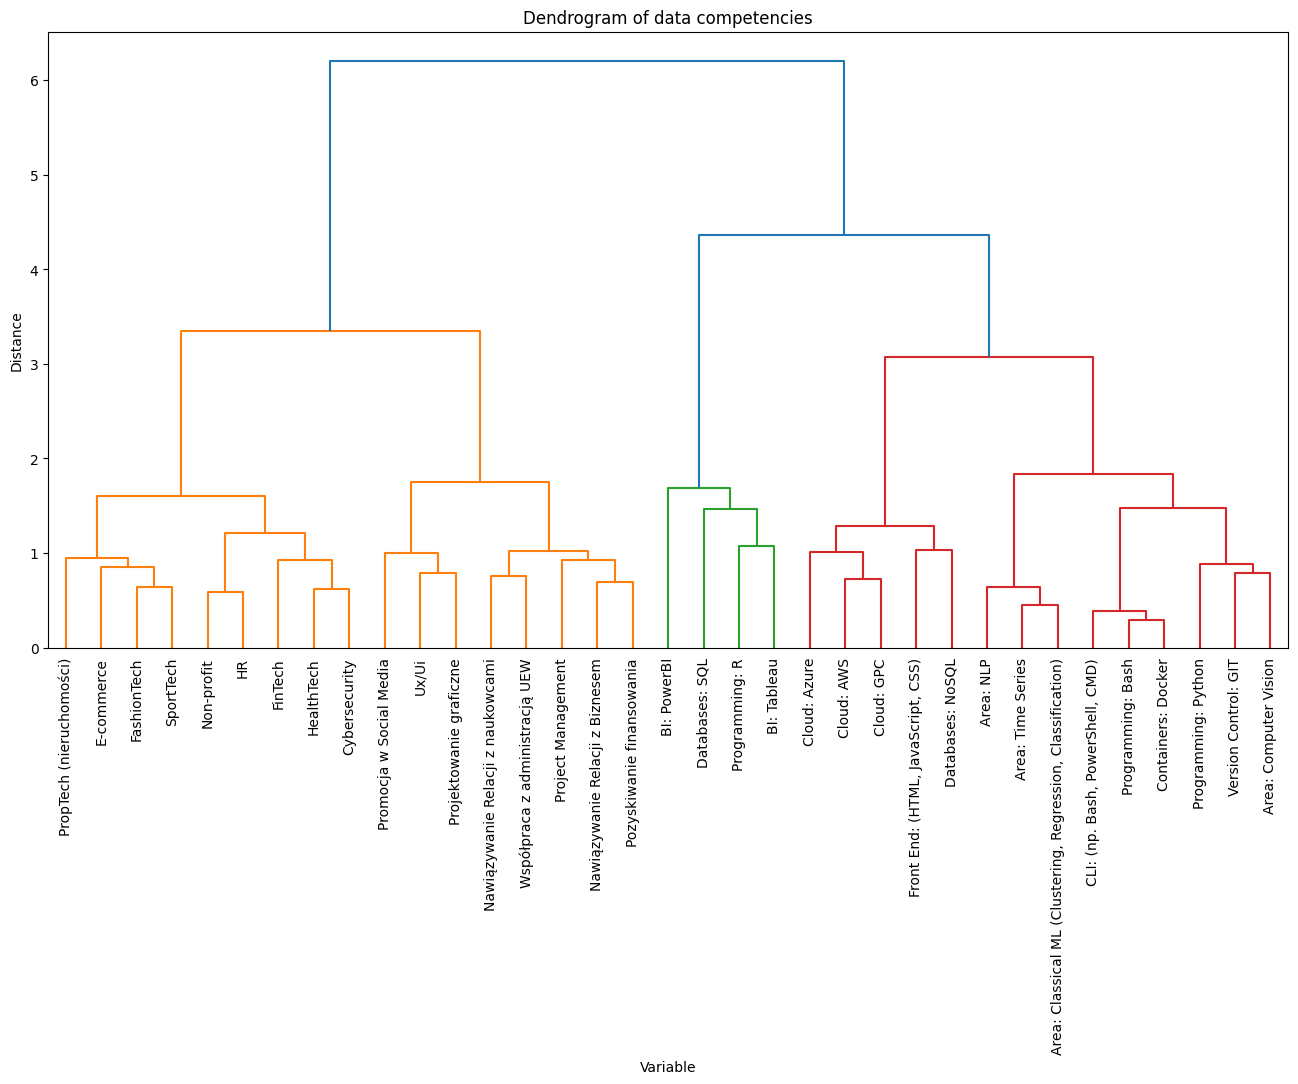

In [ ]:
import numpy as np

# Performing hierarchical clustering on the correlation matrix
from scipy.cluster.hierarchy import linkage, dendrogram

# Excluding the ID column from the correlation matrix
correlation_matrix = cleaned.drop(columns=['ID']).corr(numeric_only=True)

# Calculating the linkage matrix
linkage_matrix = linkage(correlation_matrix, method='ward')

# Plotting dendrogram to identify clusters
plt.figure(figsize=(16, 8))
dendro = dendrogram(linkage_matrix, labels=correlation_matrix.columns, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram of data competencies")
plt.xlabel("Variable")
plt.ylabel("Distance")
plt.show()

# Extracting cluster labels for each variable
from scipy.cluster.hierarchy import fcluster
cluster_labels = fcluster(linkage_matrix, t=1.5, criterion='distance')

# Combining cluster labels with the correlation matrix
clustered_data = pd.DataFrame({
    'Variable': correlation_matrix.columns,
    'Cluster': cluster_labels
})

# Sorting variables by cluster
clustered_data = clustered_data.sort_values(by='Cluster').reset_index(drop=True)


Based on dendrogram above we can see that on the left we have a cluster with skills mostly considered as <font color='yellow'>**soft skills**</font> with some exceptions like Cybersecurity, UX/UI and Graphics Design that will be treated as industries in this case.  

On the right side from the middle there is a cluster with <font color='red'>**hard skills**</font>. Green graph, representing <font color='green'>**popular data skills**</font> could be assigned to red as well to match other technical skills. The smaller branch of blue graph clustered technical skills.

Now let's visualize how the answer values distribute over all columns and sort them descendingly.

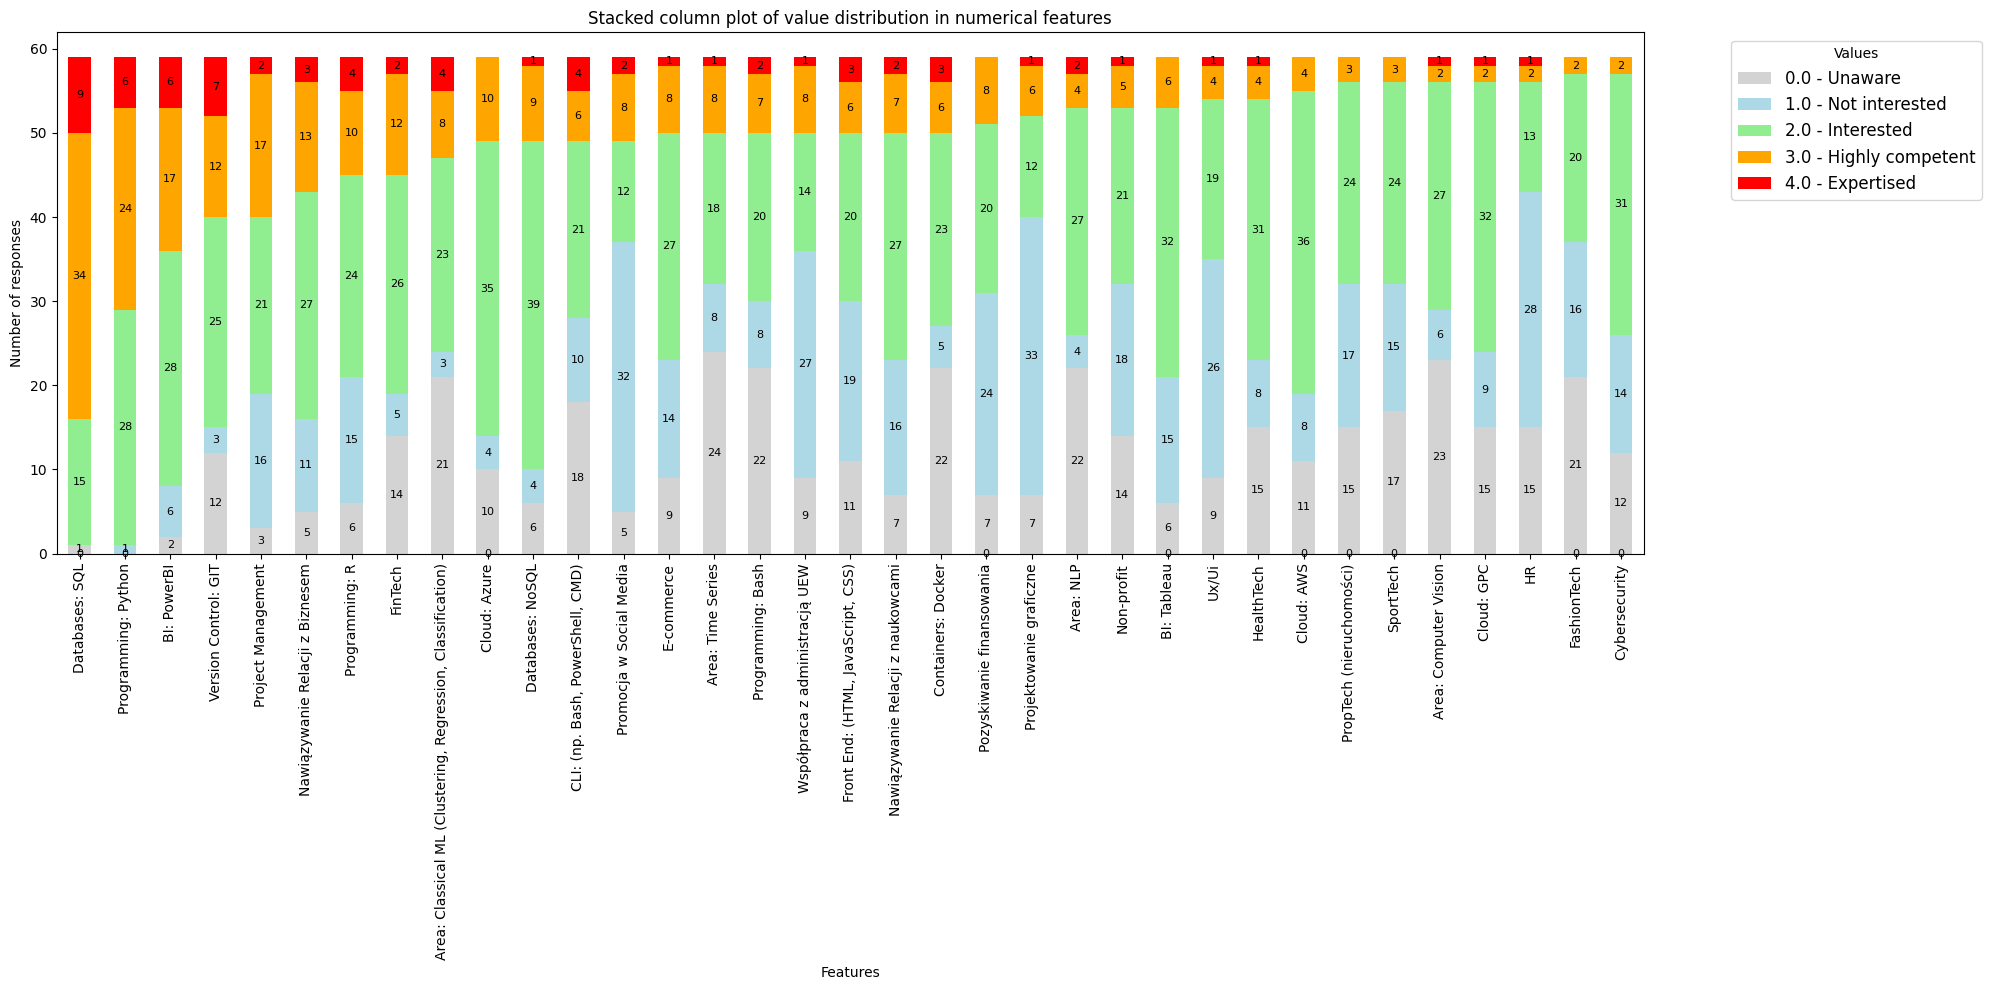

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset loading
data = pd.read_csv(r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\cleaned_dataset.csv')

# Identify numerical columns excluding "ID"
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('ID')

# Initialize a DataFrame to store the value counts
value_counts = pd.DataFrame(index=[0.0, 1.0, 2.0, 3.0, 4.0])

# Count the occurrences of each value in each numerical column
for column in numeric_columns:
    counts = data[column].value_counts().sort_index()
    value_counts[column] = counts

# Fill NaN values with 0 (for values that do not appear in a column)
value_counts = value_counts.fillna(0)

# Calculate the combined count of 4.0 and 3.0 responses
value_counts.loc['combined'] = value_counts.loc[4.0] + value_counts.loc[3.0]

# Sort the columns based on the combined count of 4.0 and 3.0 responses in descending order
value_counts = value_counts.T.sort_values(by='combined', ascending=False).T
value_counts = value_counts.drop('combined')

# Custom colors for the plot
custom_colors = {
    0.0: 'lightgrey',
    1.0: 'lightblue',
    2.0: 'lightgreen',
    3.0: 'orange',
    4.0: 'red'
}

# Plotting stacked column plot
ax = value_counts.T.plot(kind='bar', stacked=True, figsize=(20, 10), color=[custom_colors[x] for x in value_counts.index])

# Add counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)

# Titles and labels
plt.title('Stacked column plot of value distribution in numerical features')
plt.xlabel('Features')
plt.ylabel('Number of responses')

# Adjust the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [
    '0.0 - Unaware',
    '1.0 - Not interested',
    '2.0 - Interested',
    '3.0 - Highly competent',
    '4.0 - Expertised'
], title='Values', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')

plt.tight_layout()
plt.show()


Let's have a closer look into distibution amongst the strongest candidates in the most competitive categories.

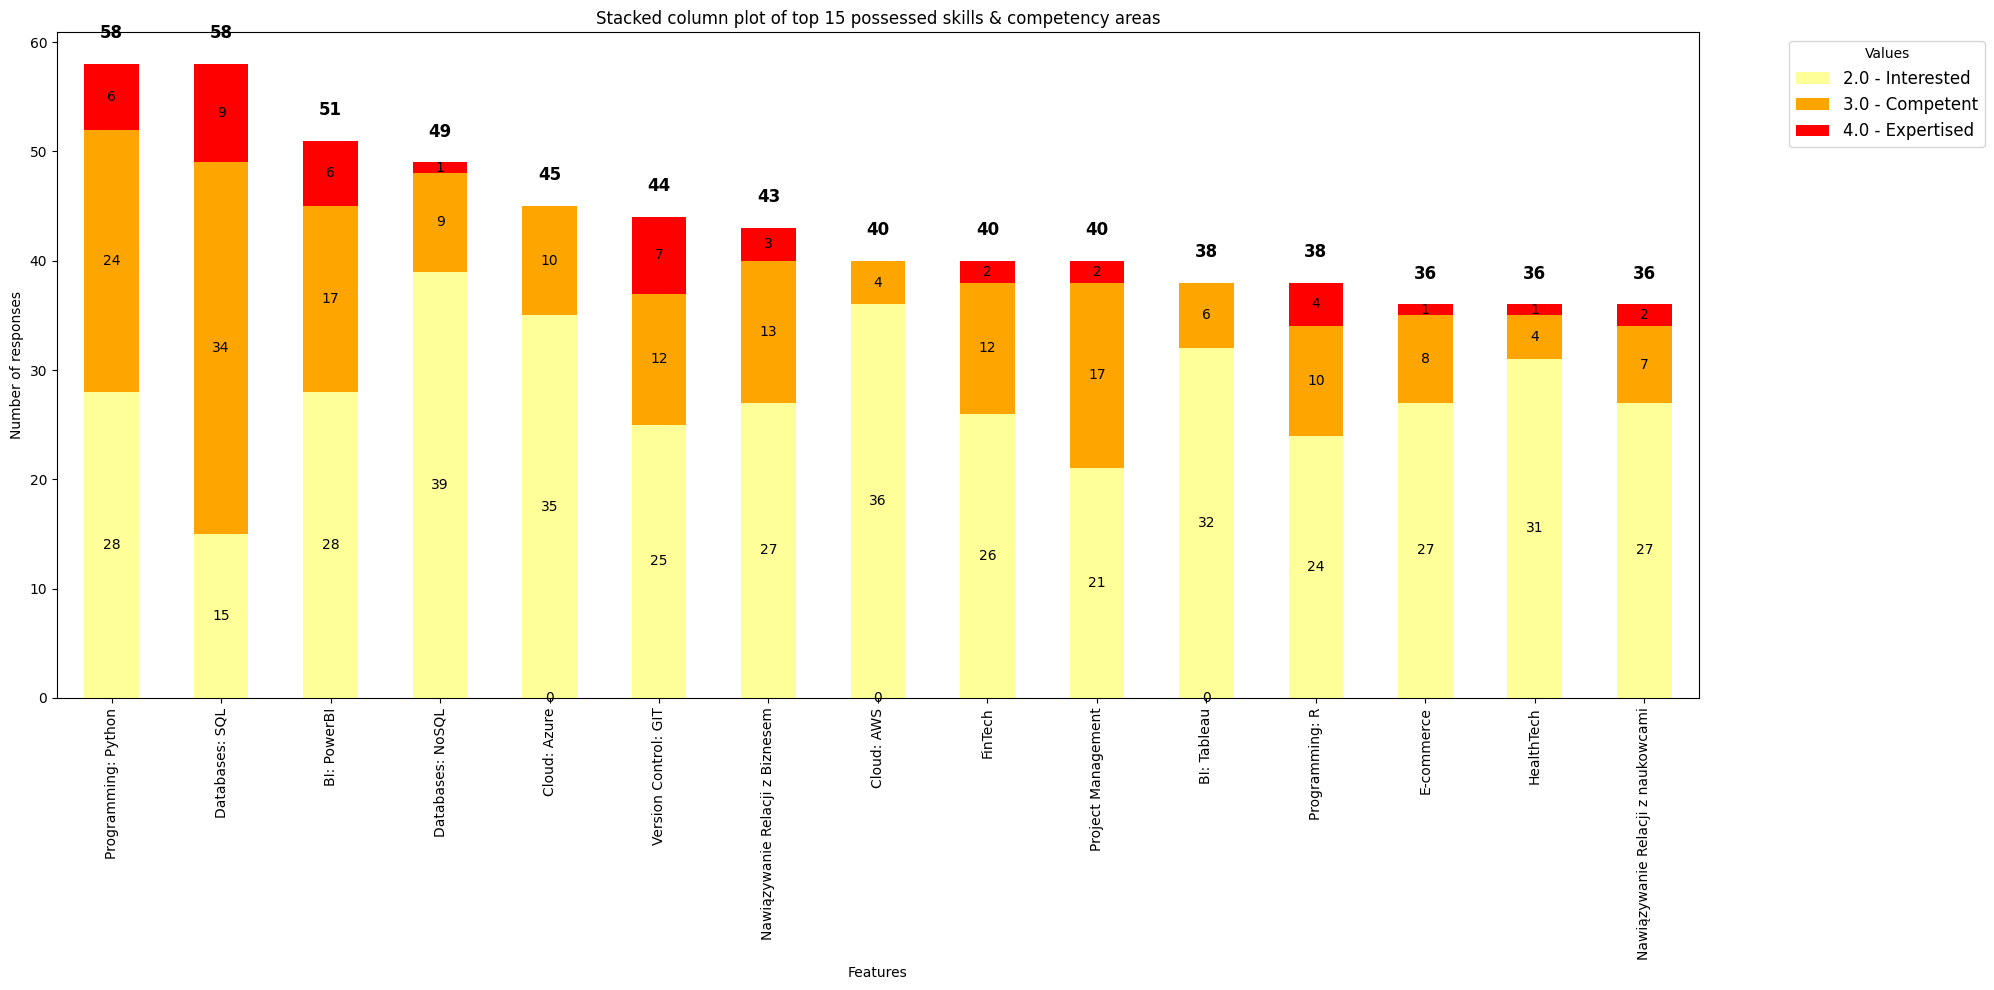

Top 15 categories with the most 4.0, 3.0, and 2.0 responses:
['Programming: Python', 'Databases: SQL', 'BI: PowerBI', 'Databases: NoSQL', 'Cloud: Azure', 'Version Control: GIT', 'Nawiązywanie Relacji z Biznesem', 'Cloud: AWS', 'FinTech', 'Project Management', 'BI: Tableau', 'Programming: R', 'E-commerce', 'HealthTech', 'Nawiązywanie Relacji z naukowcami']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset loading
data = pd.read_csv(r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\cleaned_dataset.csv')

# Identify numerical columns excluding "ID"
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('ID')

# Initialize a DataFrame to store the value counts
value_counts = pd.DataFrame(index=[2.0, 3.0, 4.0])

# Count the occurrences of each value in each numerical column
for column in numeric_columns:
    counts = data[column].value_counts().sort_index()
    value_counts[column] = counts

# Fill NaN values with 0 (for values that do not appear in a column)
value_counts = value_counts.fillna(0)

# Calculate the combined count of 4.0, 3.0, and 2.0 responses
value_counts.loc['combined'] = value_counts.loc[4.0] + value_counts.loc[3.0] + value_counts.loc[2.0]

# Sort the columns based on the combined count of 4.0, 3.0, and 2.0 responses in descending order
sorted_columns = value_counts.T.sort_values(by='combined', ascending=False).index

# Get the top 15 categories
top_15_columns = sorted_columns[:15]

# Select only the top 15 columns for plotting
value_counts_top_15 = value_counts[top_15_columns]

# Drop the 'combined' row as it is no longer needed
value_counts_top_15 = value_counts_top_15.drop('combined')

# Custom colors for the plot
custom_colors = {
    2.0: '#FFFF99',  # Mellow yellow
    3.0: 'orange',
    4.0: 'red'
}

# Plotting stacked column plot
ax = value_counts_top_15.T.plot(kind='bar', stacked=True, figsize=(20, 10), color=[custom_colors[x] for x in value_counts_top_15.index])

# Annotate the counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Annotate the summarized value above each bar in bold
for i, col in enumerate(value_counts_top_15.columns):
    total = value_counts_top_15[col].sum()
    ax.text(i, total + 2, f'{total:.0f}', ha='center', va='bottom', weight='bold', fontsize=12)

# Titles and labels
plt.title('Stacked column plot of top 15 possessed skills & competency areas')
plt.xlabel('Features')
plt.ylabel('Number of responses')
# Adjusted the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['2.0 - Interested', '3.0 - Competent', '4.0 - Expertised'], title='Values', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')

plt.tight_layout()
plt.show()

# Display the top 15 columns with the most 4.0, 3.0, and 2.0 responses
print("Top 15 categories with the most 4.0, 3.0, and 2.0 responses:")
print(top_15_columns.tolist())


As observed before, we can confirm a strong representation of candidates in data skills such as: **Python**, **SQL/NoSQL** and **PowerBI**. 

This could lead to a conclusion to focus on building teams with both technical proficiency and data visualisation skills.

##### Now let's try to showcase the most correlated pairs of values on a scatter plot and perform regression analysis.

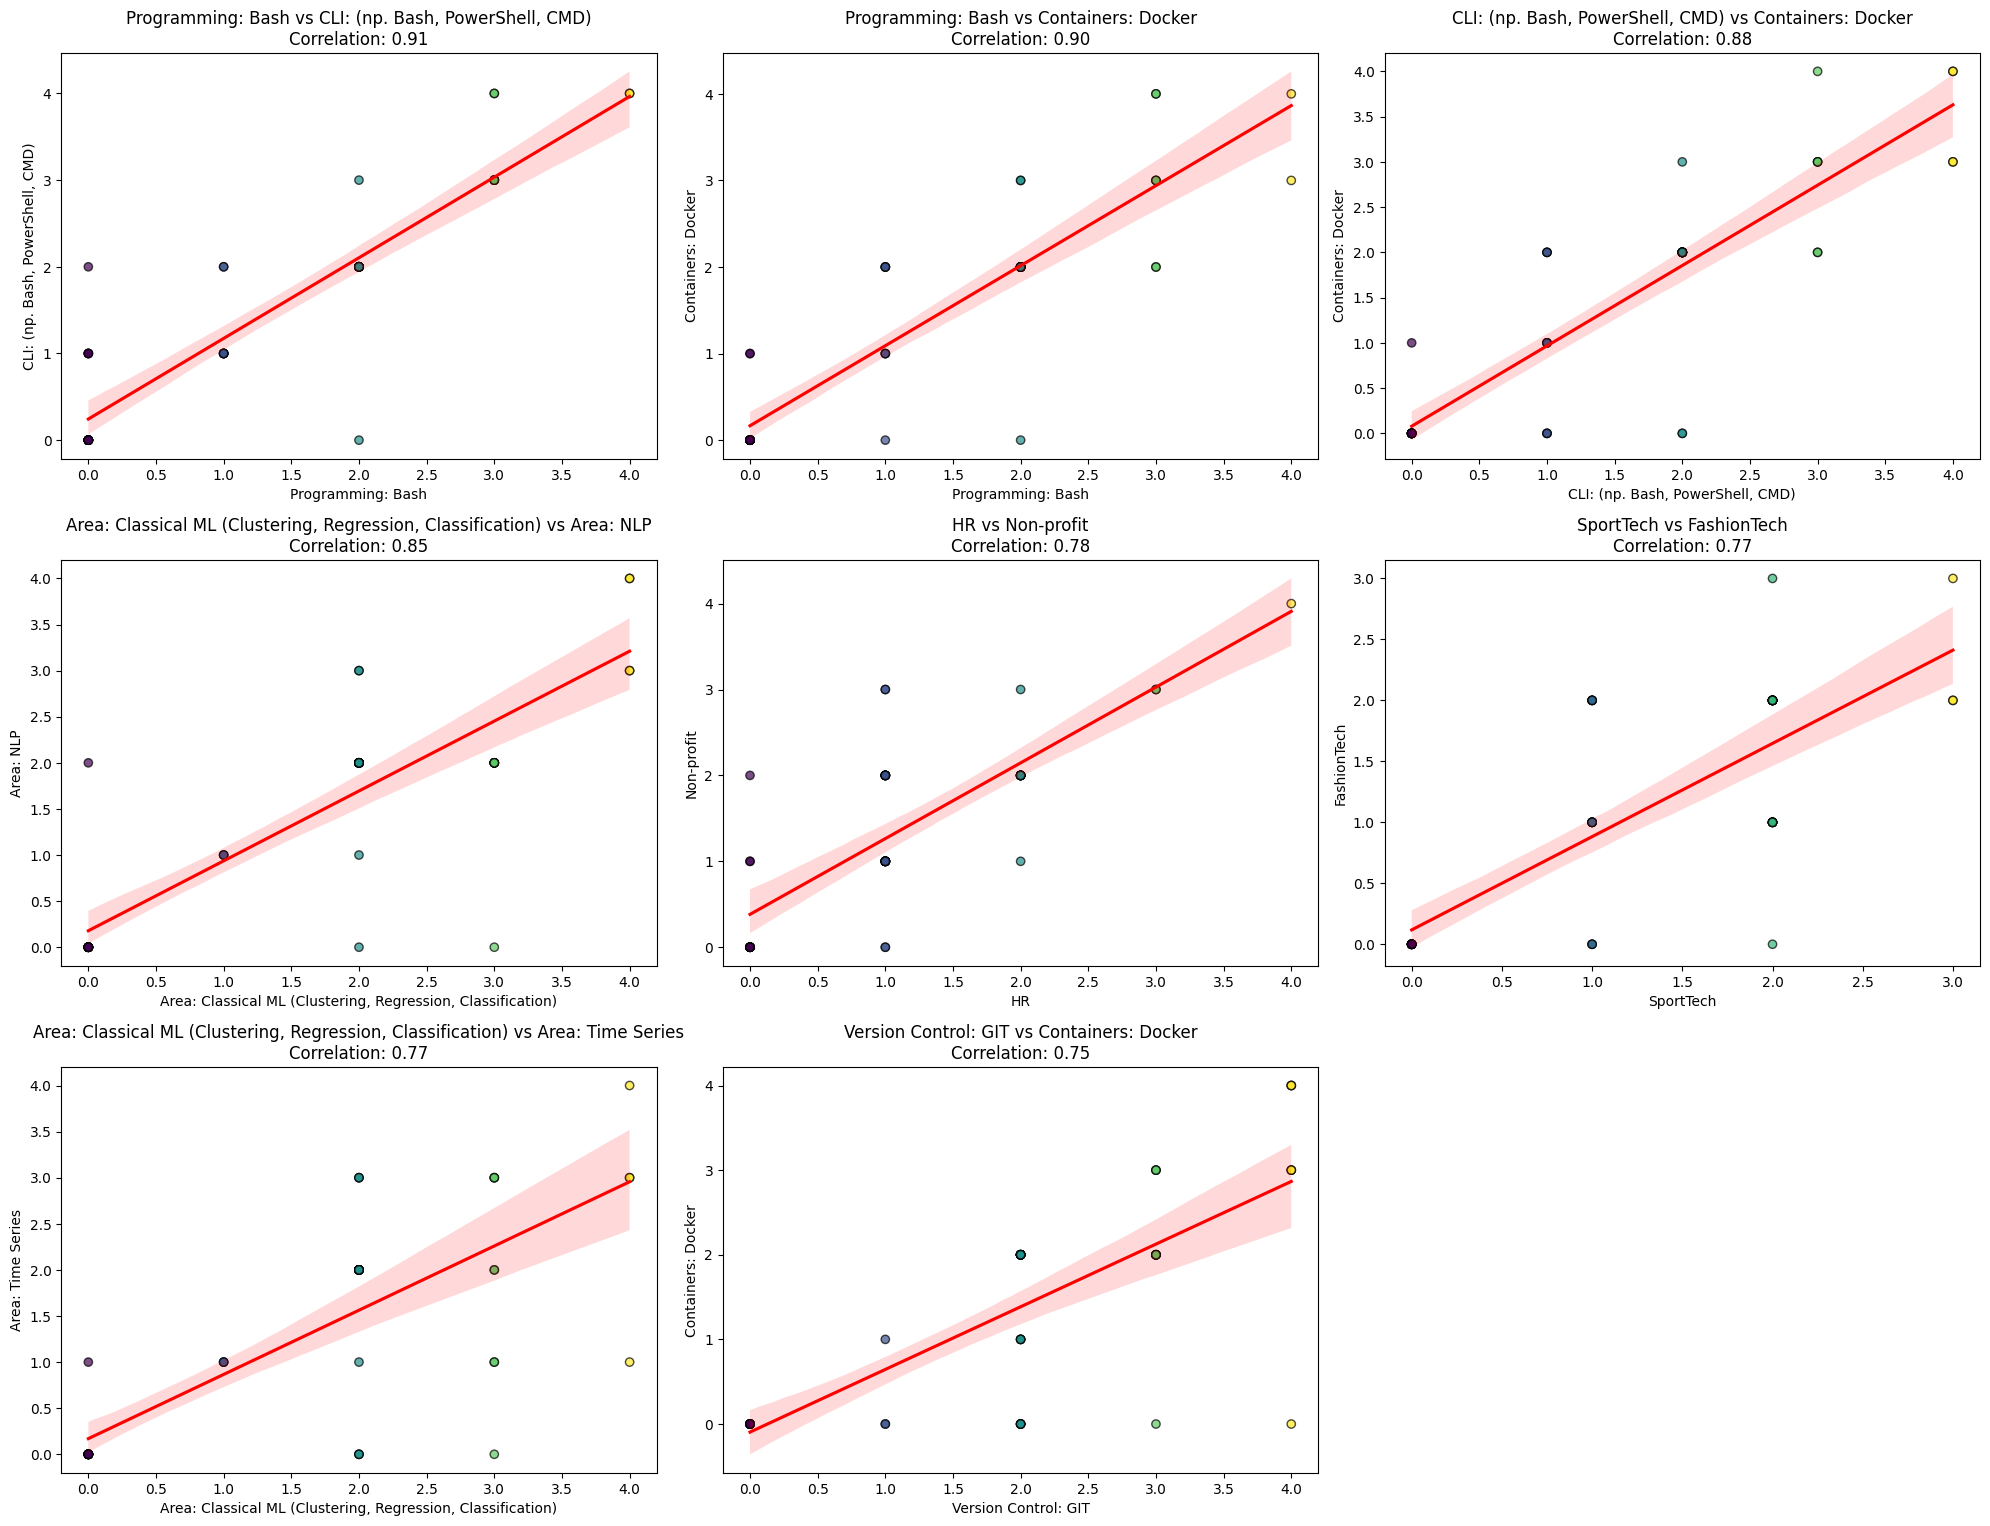

Programming: Bash                                            CLI: (np. Bash, PowerShell, CMD)    0.907887
                                                             Containers: Docker                  0.896332
CLI: (np. Bash, PowerShell, CMD)                             Containers: Docker                  0.882064
Area: Classical ML (Clustering, Regression, Classification)  Area: NLP                           0.850371
HR                                                           Non-profit                          0.778255
SportTech                                                    FashionTech                         0.774723
Area: Classical ML (Clustering, Regression, Classification)  Area: Time Series                   0.765360
Version Control: GIT                                         Containers: Docker                  0.753817
dtype: float64

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the dataset is loaded correctly
df = pd.read_csv(r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\cleaned_dataset.csv')

# Define the numerical columns for correlation analysis
numeric_columns = ['Programming: R', 'Programming: Python', 'Programming: Bash', 
                   'Version Control: GIT', 'Containers: Docker', 'CLI: (np. Bash, PowerShell, CMD)', 
                   'Front End: (HTML, JavaScript, CSS)', 'Databases: SQL', 'Databases: NoSQL', 
                   'Cloud: AWS', 'Cloud: GPC', 'BI: PowerBI', 'BI: Tableau', 
                   'Area: Time Series', 'Area: Classical ML (Clustering, Regression, Classification)', 
                   'Area: NLP', 'Area: Computer Vision', 'Project Management', 'Promocja w Social Media', 
                   'Ux/Ui', 'Projektowanie graficzne', 'Nawiązywanie Relacji z Biznesem', 
                   'Nawiązywanie Relacji z naukowcami', 'Pozyskiwanie finansowania', 
                   'Współpraca z administracją UEW', 'FinTech', 'HealthTech', 'FashionTech', 
                   'E-commerce', 'SportTech', 'Non-profit', 'PropTech (nieruchomości)', 
                   'Cybersecurity', 'HR']

# Filter the dataset to include only the numerical columns
numeric_data = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Filter pairs with correlation greater than 0.75
high_corr_pairs_filtered_75 = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs_filtered_75 = high_corr_pairs_filtered_75[high_corr_pairs_filtered_75 < 1]  # Exclude self-correlation
high_corr_pairs_filtered_75 = high_corr_pairs_filtered_75[high_corr_pairs_filtered_75 > 0.75].drop_duplicates()

# Display the top 12 pairs with the new threshold
top_pairs_75 = high_corr_pairs_filtered_75.head(12)

# Plotting scatter plots with regression lines for filtered correlated pairs with the new threshold
plt.figure(figsize=(20, 20))
cmap = 'viridis'  # Define the colormap

for i, (pair, corr) in enumerate(top_pairs_75.items()):
    feature1, feature2 = pair
    plt.subplot(4, 3, i+1)
    plt.scatter(numeric_data[feature1], numeric_data[feature2], c=numeric_data[feature1], cmap=cmap, edgecolor='black', alpha=0.7)
    sns.regplot(x=numeric_data[feature1], y=numeric_data[feature2], scatter=False, color='red')
    plt.title(f'{feature1} vs {feature2}\nCorrelation: {corr:.2f}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
plt.tight_layout()
plt.show()

# Displaying the top pairs
top_pairs_75

##### General observations:

- There is a strong link between **command-line proficiency** and other technical skills such as **Bash** scripting and **Docker**. This indicates that individuals comfortable with command-line interfaces are likely to engage deeply with other technical tools and automation processes.

- The correlation between areas like **Classical ML** and **NLP**, and **Time Series** analysis with **Classical ML**, suggests that individuals working in these fields often need a broad set of skills and would likely be involved in interdisciplinary projects.

- The correlations observed in sectors like **Non-profit** and **HR**, and **SportTech** and **FashionTech**, reflect specific industry trends where certain roles and technological advancements overlap significantly.

##### Here are the top 8 pairs displayed in the scatter plots:

- **CLI: (np. Bash, PowerShell, CMD)** and **Programming: Bash:** 0.91
  
Strong positive correlation. Users proficient in command-line interfaces are highly likely to have proficiency in Bash scripting.

- **Programming: Bash** and **Containers: Docker:** 0.9
  
Strong correlation between Bash scripting skills and Docker usage, indicating their frequent use together in automation and deployment.

- **CLI: (np. Bash, PowerShell, CMD)** and **Containers: Docker:** 0.88
  
High proficiency in command-line interfaces is strongly linked to Docker usage, reflecting the common use of command-line tools in managing Docker containers.

- **Area: Classical ML (Clustering, Regression, Classification)** and **Area: NLP:** 0.85
  
Significant overlap between classical machine learning techniques and NLP, suggesting that expertise in one often includes the other.

- **Non-profit** and **HR:** 0.78
  
Moderate to strong correlation, potentially indicating a high involvement of HR functions within non-profit organizations.

- **SportTech** and **FashionTech:** 0.77
  
Correlation suggests shared innovation trends and technological overlaps between the sports and fashion tech industries.

- **Area: Time Series** and **Area: Classical ML (Clustering, Regression, Classification):** 0.77
  
Indicates that time series analysis often employs methods from classical ML, showing a significant overlap in methodologies.

- **Version Control: GIT** and **Containers: Docker:** 0.75
  
Moderate to strong correlation, reflecting their essential roles in modern DevOps and CI/CD practices.

##### Let's utilize PCA analysis:

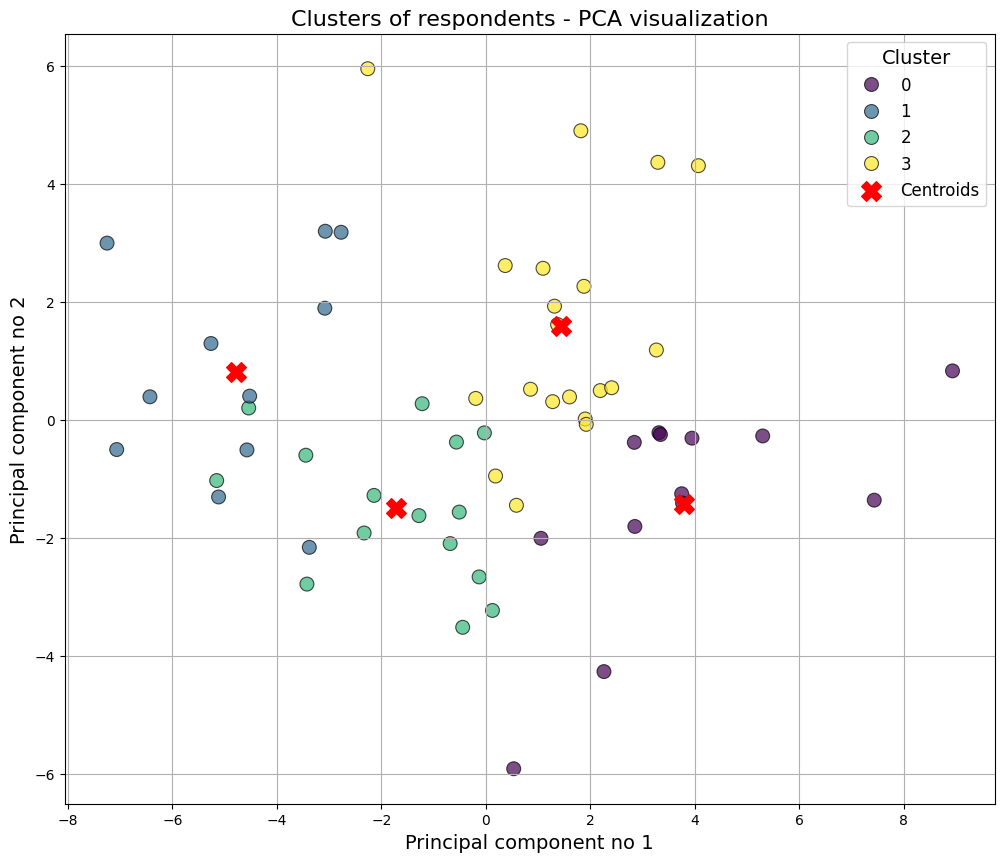

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv(r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\cleaned_dataset.csv')

# List of numerical columns
numerical_columns = ['Programming: R', 'Programming: Python', 'Programming: Bash', 
                     'Version Control: GIT', 'Containers: Docker', 'CLI: (np. Bash, PowerShell, CMD)', 
                     'Front End: (HTML, JavaScript, CSS)', 'Databases: SQL', 'Databases: NoSQL', 
                     'Cloud: Azure', 'Cloud: AWS', 'Cloud: GPC', 'BI: PowerBI', 'BI: Tableau', 
                     'Area: Time Series', 'Area: Classical ML (Clustering, Regression, Classification)', 
                     'Area: NLP', 'Area: Computer Vision', 'Project Management', 'Promocja w Social Media', 
                     'Ux/Ui', 'Projektowanie graficzne', 'Nawiązywanie Relacji z Biznesem', 
                     'Nawiązywanie Relacji z naukowcami', 'Pozyskiwanie finansowania', 
                     'Współpraca z administracją UEW', 'FinTech', 'HealthTech', 'FashionTech', 
                     'E-commerce', 'SportTech', 'Non-profit', 'PropTech (nieruchomości)', 
                     'Cybersecurity', 'HR']

# Standardize the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# Apply KMeans clustering with the optimal number of clusters (assuming 4 based on elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Apply PCA for dimensionality reduction to visualize the clusters
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

# Improved visualization of the clusters
plt.figure(figsize=(12, 10))
palette = sns.color_palette("viridis", as_cmap=True)
scatter = sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette=palette, s=100, edgecolor='k', alpha=0.7)

# Add centroids of the clusters
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', label='Centroids', marker='X')

# Adding titles and labels
plt.title('Clusters of respondents - PCA visualization', fontsize=16)
plt.xlabel('Principal component no 1', fontsize=14)
plt.ylabel('Principal component no 2', fontsize=14)

# Enhancing the legend
plt.legend(title='Cluster', title_fontsize='14', fontsize='12', loc='best')
plt.grid(True)
plt.show()

**Cluster 0**: Respondents with a balanced set of skills and proficiencies across various areas.

**Cluster 1**: Contains respondents who may be beginners or have lower proficiency in many areas.

**Cluster 2**: Includes respondents who are highly proficient in certain areas or have specialized skills.

**Cluster 3**: Comprises respondents with a mix of moderate to high skills in various areas, similar to cluster 0 but with distinct differences

Centroids marked on the graph are centres of each cluster.

##### For better understading of distribution of skills amongst different clusters I will use violin plots.

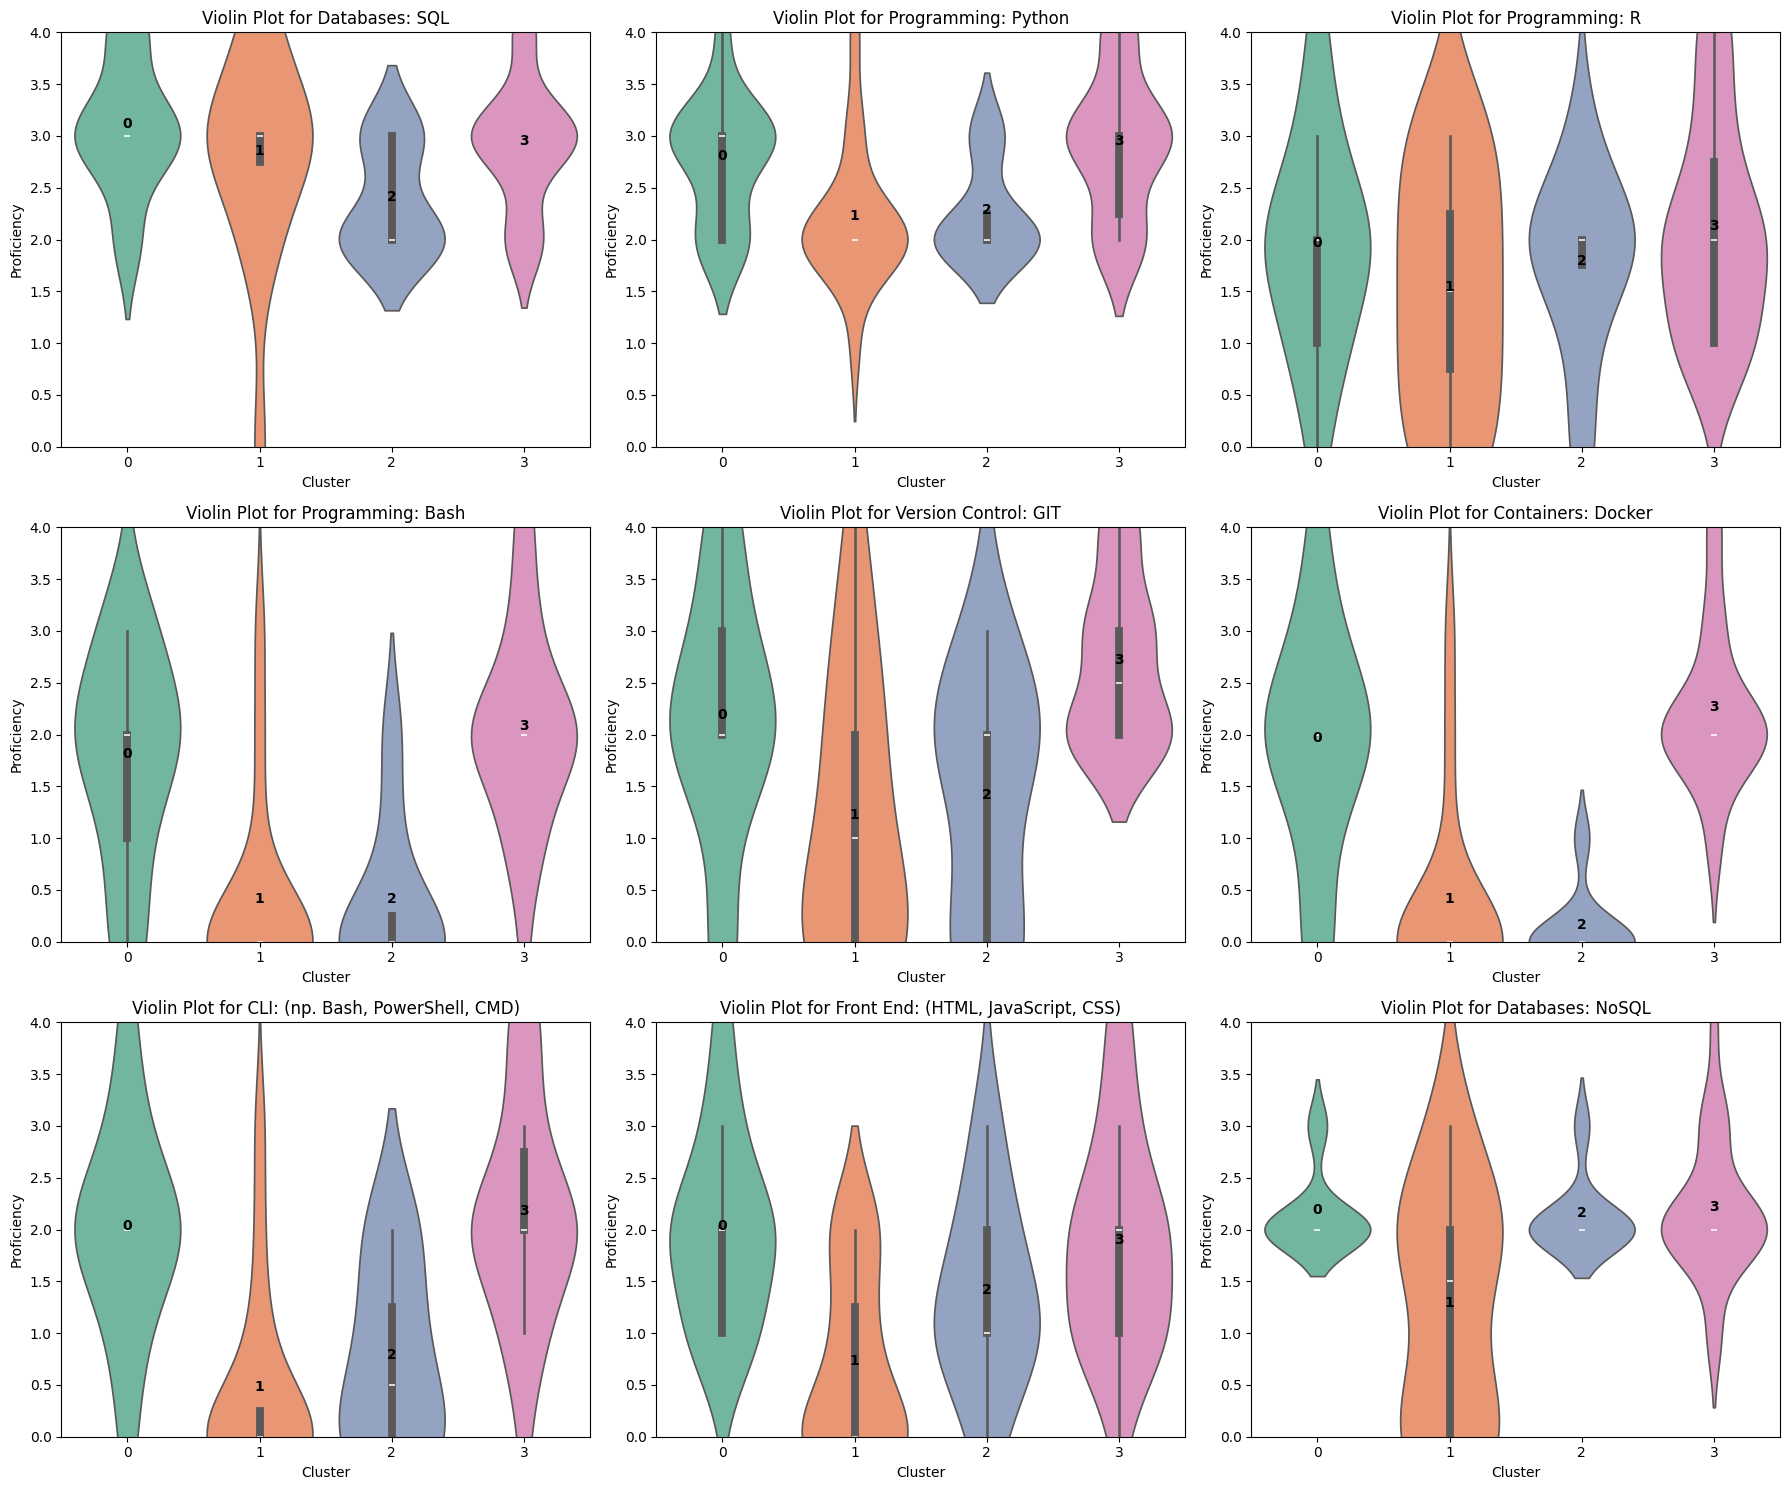

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv(r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\cleaned_dataset.csv')

# Define the numerical columns for skill analysis
skill_columns = ['Programming: R', 'Programming: Python', 'Programming: Bash', 
                 'Version Control: GIT', 'Containers: Docker', 'CLI: (np. Bash, PowerShell, CMD)', 
                 'Front End: (HTML, JavaScript, CSS)', 'Databases: SQL', 'Databases: NoSQL', 
                 'Cloud: AWS', 'Cloud: GPC', 'BI: PowerBI', 'BI: Tableau', 
                 'Area: Time Series', 'Area: Classical ML (Clustering, Regression, Classification)', 
                 'Area: NLP', 'Area: Computer Vision', 'Project Management', 'Promocja w Social Media', 
                 'Ux/Ui', 'Projektowanie graficzne', 'Nawiązywanie Relacji z Biznesem', 
                 'Nawiązywanie Relacji z naukowcami', 'Pozyskiwanie finansowania', 
                 'Współpraca z administracją UEW', 'FinTech', 'HealthTech', 'FashionTech', 
                 'E-commerce', 'SportTech', 'Non-profit', 'PropTech (nieruchomości)', 
                 'Cybersecurity', 'HR']

# Standardize the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[skill_columns])

# Apply KMeans clustering with the optimal number of clusters (assuming 4 based on elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Identify the best skills from each cluster
best_skills = df.groupby('Cluster')[skill_columns].mean().idxmax(axis=1).unique()

# Prepare data for violin plots
melted_df = df.melt(id_vars=['Cluster'], value_vars=skill_columns, var_name='Skill', value_name='Proficiency')

# Combine the best skills with some additional unique skills, excluding 'Cloud: Azure'
additional_skills = [skill for skill in skill_columns if skill not in best_skills][:9 - len(best_skills)]  # Ensure we get 9 unique skills in total
selected_skills = list(best_skills) + additional_skills

# Define a custom color palette with 4 distinct colors
custom_palette = sns.color_palette("Set2", 4)  # Using 'Set2' for distinct colors

# Plot violin plots for the selected skills
plt.figure(figsize=(18, 15))
for i, skill in enumerate(selected_skills, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x='Cluster', y='Proficiency', hue='Cluster', data=melted_df[melted_df['Skill'] == skill], palette=custom_palette, legend=False)
    plt.title(f'Violin Plot for {skill}')
    plt.xlabel('Cluster')
    plt.ylabel('Proficiency')
    plt.ylim(0, 4)  # Set y-axis limits from 0 to 4

    # Adding cluster labels inside the plot
    cluster_means = df.groupby('Cluster')[skill].mean()
    for cluster, mean in cluster_means.items():
        plt.text(cluster, mean, f'{cluster}', horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.tight_layout()
plt.show()

**Cluster 0** consistently shows higher proficiency in a broader range of skills, indicating a well-rounded skill set among respondents.

**Cluster 1** also shows high proficiency in several key areas but is slightly less consistent compared to **Cluster 0**.

**Cluster 2** and **Cluster 3** generally show lower proficiency across most skills, suggesting that these respondents might be more specialized or less experienced in these areas.

The violin plots reveal the distribution of skills within each cluster, highlighting that even within a cluster, there can be significant variation in proficiency levels.
These insights can be useful for targeted interventions, such as:

Providing advanced training in specific skills for **Cluster 2** and **Cluster 3** to bring their proficiency levels up.
Encouraging knowledge sharing and mentorship from **Cluster 0** and **Cluster 1** to other clusters.
Identifying areas where the community as a whole might need additional resources or support.

Now let's compare competencies amongst all individuals:

In [2]:
# Define the updated categories with original names for columns
categories_updated = {
    'Cloud & Databases': ['Cloud: AWS', 'Cloud: Azure', 'Cloud: GPC', 'Databases: NoSQL', 'Databases: SQL'],
    'BI': ['BI: PowerBI', 'BI: Tableau'],
    'Programming': ['Programming: R', 'Programming: Python', 'Programming: Bash', 'CLI: (np. Bash, PowerShell, CMD)', 'Version Control: GIT', 'Containers: Docker', 'Front End: (HTML, JavaScript, CSS)'],
    'Data Science': ['Area: Time Series', 'Area: Classical ML (Clustering, Regression, Classification)', 'Area: NLP', 'Area: Computer Vision'],
    'Industry': ['FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech', 'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR'],
    'Soft skills': ['Project Management','Promocja w Social Media','Ux/Ui','Projektowanie graficzne','Nawiązywanie Relacji z Biznesem','Nawiązywanie Relacji z naukowcami','Pozyskiwanie finansowania','Współpraca z administracją UEW']
}

# Ensure all columns in the categories are present in the data
selected_columns = [col for sublist in categories_updated.values() for col in sublist if col in data.columns]

# Select only the columns that fall into the defined categories
heatmap_data_filtered = data[selected_columns]

# Generate a new mapping for column names with category as prefix
column_category_mapping = {}
for category, columns in categories_updated.items():
    for column in columns:
        if column in data.columns:
            column_category_mapping[column] = f"{category}: {column.split(':')[-1]}"

# Rename columns with new category mapping
heatmap_data_renamed = heatmap_data_filtered.rename(columns=column_category_mapping)

# Generate the heatmap with new column names
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data_renamed.T, cmap='YlGnBu', cbar=True, annot=False, fmt="d", linewidths=.5)

plt.title('Individuals competencies - categorized', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('ID', fontsize=15)
plt.ylabel('Competencies', fontsize=15)
plt.show()

NameError: name 'data' is not defined

Now let's make strong groups based on similar skillsets. These groups will have 2-4 people, 

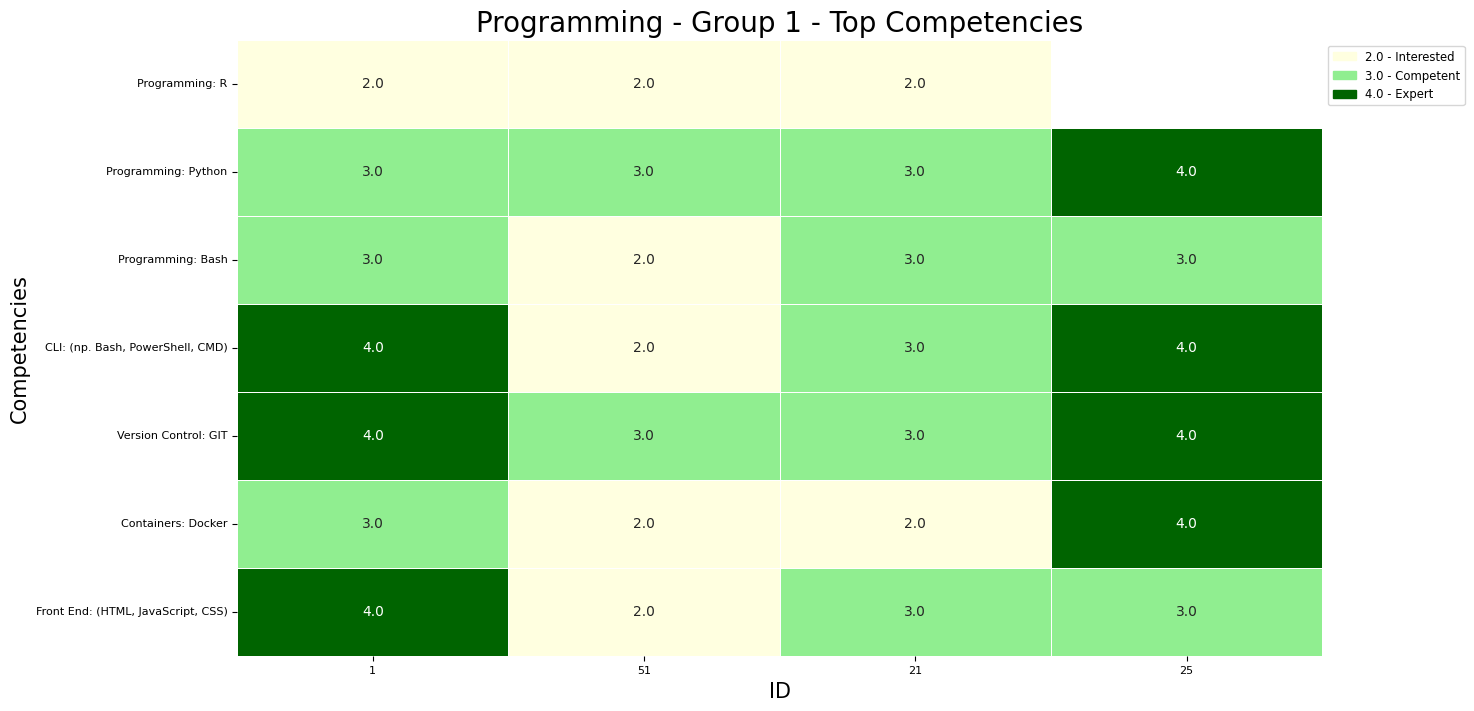

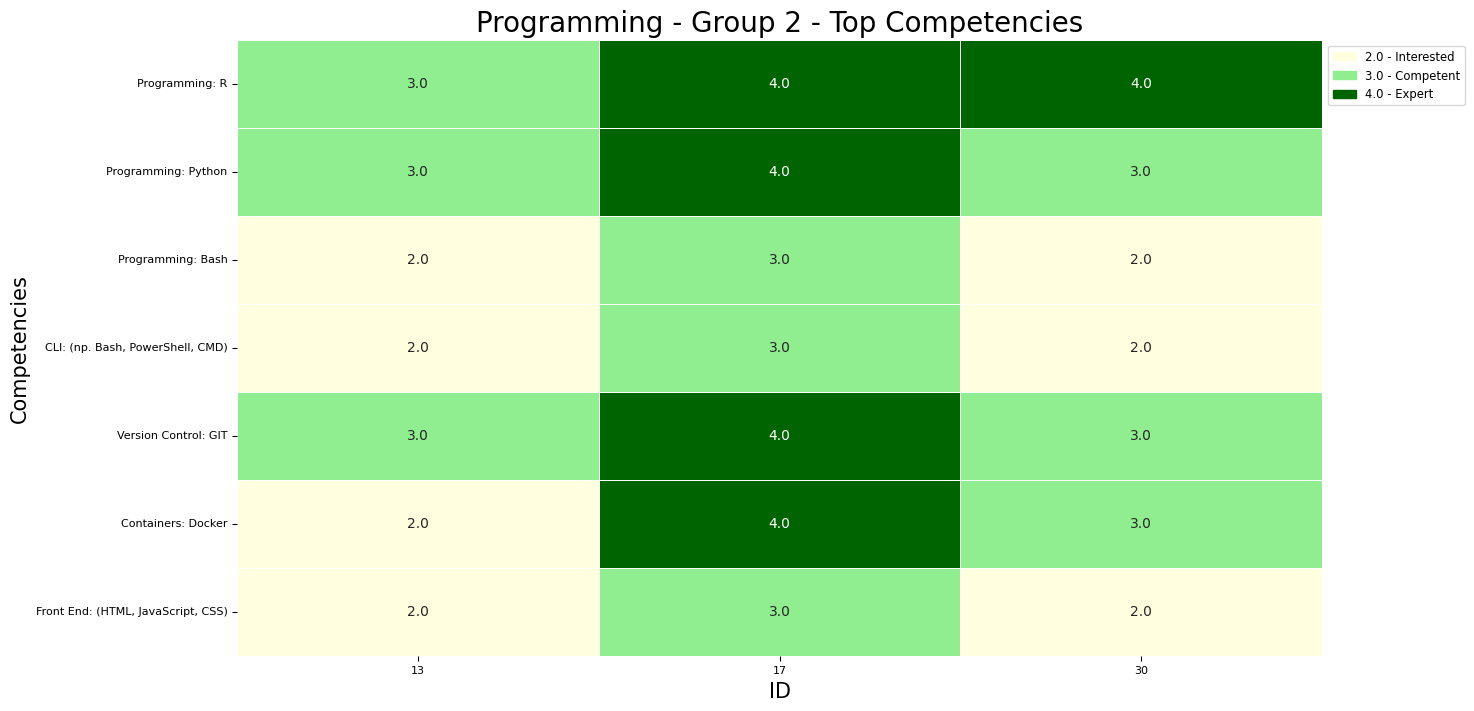

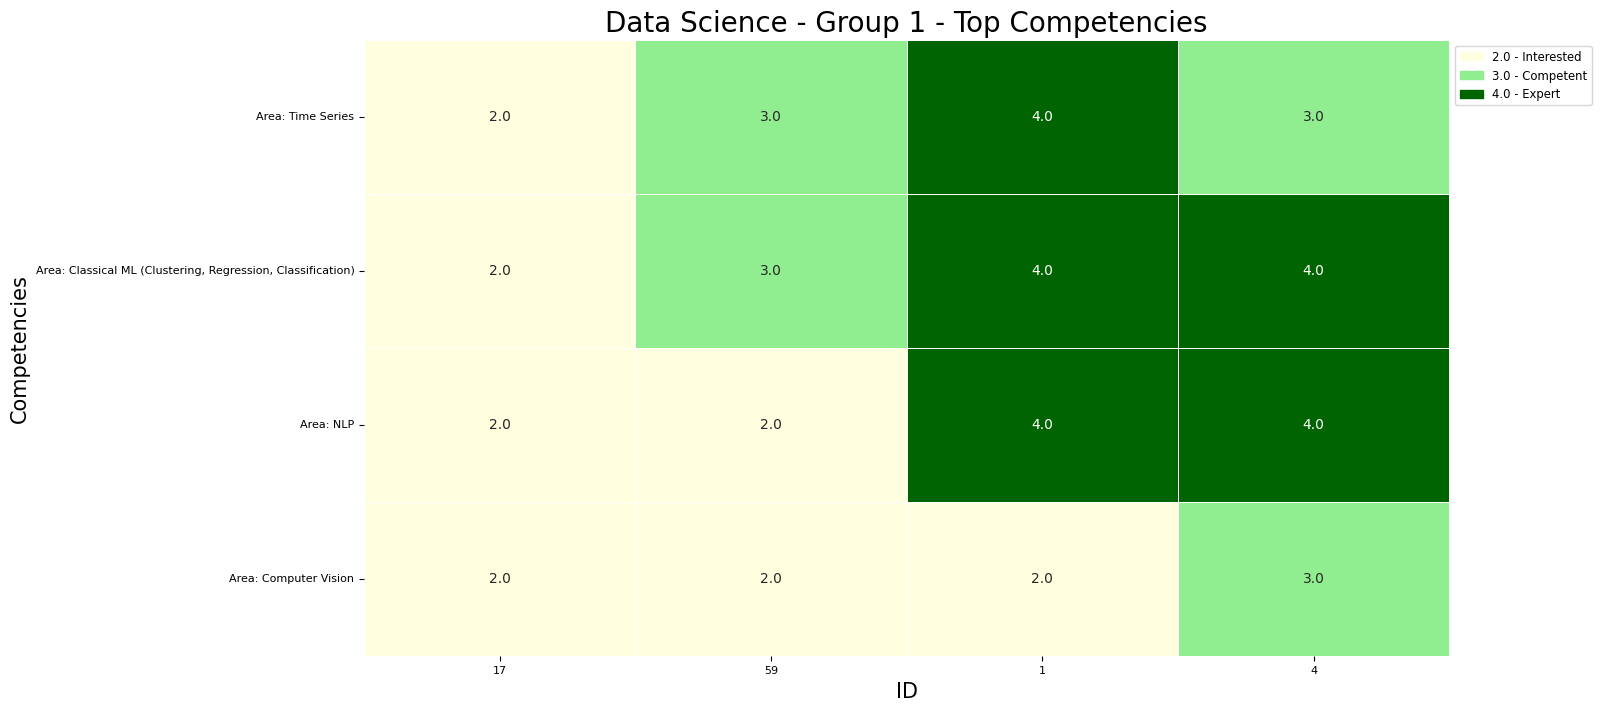

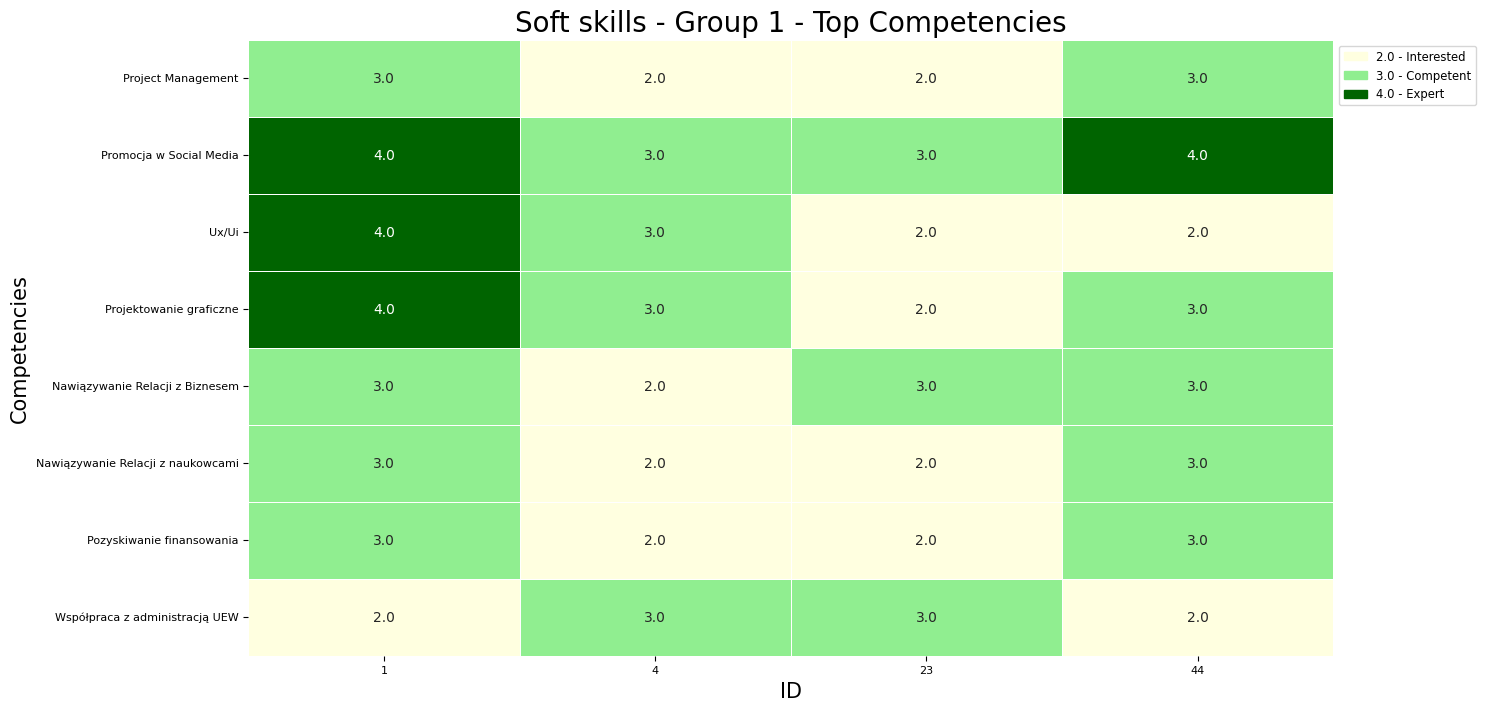

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.patches import Patch


# Define the updated categories with original names for columns
categories_updated = {
    'Cloud & Databases': ['Cloud: AWS', 'Cloud: Azure', 'Cloud: GPC', 'Databases: NoSQL', 'Databases: SQL'],
    'BI': ['BI: PowerBI', 'BI: Tableau'],
    'Programming': ['Programming: R', 'Programming: Python', 'Programming: Bash', 'CLI: (np. Bash, PowerShell, CMD)', 'Version Control: GIT', 'Containers: Docker', 'Front End: (HTML, JavaScript, CSS)'],
    'Data Science': ['Area: Time Series', 'Area: Classical ML (Clustering, Regression, Classification)', 'Area: NLP', 'Area: Computer Vision'],
    'Industry': ['FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech', 'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR'],
    'Soft skills': ['Project Management','Promocja w Social Media','Ux/Ui','Projektowanie graficzne','Nawiązywanie Relacji z Biznesem','Nawiązywanie Relacji z naukowcami','Pozyskiwanie finansowania','Współpraca z administracją UEW']
}

# Create a custom colormap
cmap = mcolors.ListedColormap(['#FFFFE0', '#90EE90', '#006400'])
norm = mcolors.BoundaryNorm([2, 3, 4, 5], cmap.N)

# Create custom legend patches
legend_patches = [
    Patch(color='#FFFFE0', label='2.0 - Interested'),
    Patch(color='#90EE90', label='3.0 - Competent'),
    Patch(color='#006400', label='4.0 - Expert')
]

# Function to process each category and plot the heatmap for strong groups
def process_category(category_name, columns):
    competencies_data = data[columns]

    # Filter out 0.0 and 1.0 competencies
    filtered_data = competencies_data.applymap(lambda x: x if x in [2, 3, 4] else np.nan).dropna(how='all', axis=1)

    # Normalize the data
    scaler = StandardScaler()
    competencies_scaled = scaler.fit_transform(filtered_data.fillna(0))

    # Calculate similarity matrix
    similarity_matrix = cosine_similarity(competencies_scaled)

    # Perform clustering
    clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5, linkage='average')
    clustering.fit(similarity_matrix)

    # Assign groups based on clustering
    data['Group'] = clustering.labels_

    # Filter out groups with less than 2 people
    group_sizes = data['Group'].value_counts()
    valid_groups = group_sizes[group_sizes >= 2].index
    data_valid = data[data['Group'].isin(valid_groups)]

    # Split larger groups into smaller ones if necessary, ensuring each group has at least two 4.0 values
    new_groups = []
    for group in valid_groups:
        group_data = data_valid[data_valid['Group'] == group]
        group_size = len(group_data)
        while group_size > 4:
            # Find individuals with at least two 4.0 competencies
            high_competency = group_data[columns].apply(lambda row: (row == 4.0).sum() >= 2, axis=1)
            if high_competency.sum() == 0:
                break  # Exit if no groups with at least two 4.0 values are found
            
            high_comp_individuals = group_data[high_competency]
            remaining_individuals = group_data[~high_competency]
            
            if len(high_comp_individuals) >= 4:
                new_groups.append(high_comp_individuals.iloc[:4])
                group_data = group_data.iloc[4:]
            else:
                split_group = pd.concat([high_comp_individuals, remaining_individuals.iloc[:4 - len(high_comp_individuals)]])
                new_groups.append(split_group)
                group_data = remaining_individuals.iloc[4 - len(high_comp_individuals):]
            
            group_size = len(group_data)
        
        if group_size >= 2 and (group_data[columns] == 4.0).sum(axis=1).max() >= 2:
            new_groups.append(group_data)

    # Plot heatmaps for each new group, showing only the best skills
    group_counter = 1
    for group_data in new_groups:
        group_ids = group_data['ID']
        group_competencies = group_data[columns]

        # Filter competencies to only include those rated 2, 3, or 4
        best_competencies = group_competencies.applymap(lambda x: x if x in [2, 3, 4] else np.nan)
        best_competencies = best_competencies.dropna(how='all').dropna(axis=1, how='all')

        # Ensure the group has at least two 4.0 values
        if (best_competencies == 4.0).sum().sum() < 2:
            continue

        # Sort columns to prioritize 4.0, then 3.0, then 2.0
        sorted_competencies = best_competencies.apply(lambda col: col.sort_values(ascending=False), axis=0)

        if not sorted_competencies.empty:
            heatmap_data_renamed = sorted_competencies.set_index(group_ids)

            plt.figure(figsize=(14, 8))
            sns.heatmap(heatmap_data_renamed.T, cmap=cmap, norm=norm, cbar=False, annot=True, fmt=".1f", linewidths=.5)
            plt.title(f'{category_name} - Group {group_counter} - Top Competencies', fontsize=20)
            plt.xticks(fontsize=8)
            plt.yticks(fontsize=8)
            plt.xlabel('ID', fontsize=15)
            plt.ylabel('Competencies', fontsize=15)
            plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
            plt.show()
            group_counter += 1

# Process each category and plot the heatmaps
for category, columns in categories_updated.items():
    process_category(category, columns)



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the updated categories with original names for columns
categories_updated = {
    'Cloud & Databases': ['Cloud: AWS', 'Cloud: Azure', 'Cloud: GPC', 'Databases: NoSQL', 'Databases: SQL'],
    'BI': ['BI: PowerBI', 'BI: Tableau'],
    'Programming': ['Programming: R', 'Programming: Python', 'Programming: Bash', 'CLI: (np. Bash, PowerShell, CMD)', 'Version Control: GIT', 'Containers: Docker', 'Front End: (HTML, JavaScript, CSS)'],
    'Data Science': ['Area: Time Series', 'Area: Classical ML (Clustering, Regression, Classification)', 'Area: NLP', 'Area: Computer Vision'],
    'Industry': ['FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech', 'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR'],
    'Soft skills': ['Project Management','Promocja w Social Media','Ux/Ui','Projektowanie graficzne','Nawiązywanie Relacji z Biznesem','Nawiązywanie Relacji z naukowcami','Pozyskiwanie finansowania','Współpraca z administracją UEW']
}

# Create a custom colormap
cmap = mcolors.ListedColormap(['#FFFFE0', '#90EE90', '#006400'])
norm = mcolors.BoundaryNorm([2, 3, 4, 5], cmap.N)

# Create custom legend patches
legend_patches = [
    Patch(color='#FFFFE0', label='2.0 - Interested'),
    Patch(color='#90EE90', label='3.0 - Competent'),
    Patch(color='#006400', label='4.0 - Expert')
]

def process_category(category_name, columns):
    competencies_data = data[columns]

    # Filter out 0.0 and 1.0 competencies
    filtered_data = competencies_data.applymap(lambda x: x if x in [2, 3, 4] else np.nan).dropna(how='all', axis=1)

    # Normalize the data
    scaler = StandardScaler()
    competencies_scaled = scaler.fit_transform(filtered_data.fillna(0))

    # Calculate similarity matrix
    similarity_matrix = cosine_similarity(competencies_scaled)

    # Perform clustering
    clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5, linkage='average')
    clustering.fit(similarity_matrix)

    # Assign groups based on clustering
    data['Group'] = clustering.labels_

    # Filter out groups with less than 2 people
    group_sizes = data['Group'].value_counts()
    valid_groups = group_sizes[group_sizes >= 2].index
    data_valid = data[data['Group'].isin(valid_groups)]

    # Split larger groups into smaller ones if necessary, ensuring each group has at least two 4.0 values
    new_groups = []
    for group in valid_groups:
        group_data = data_valid[data_valid['Group'] == group]
        group_size = len(group_data)
        while group_size > 4:
            high_competency = group_data[columns].apply(lambda row: (row == 4.0).sum() >= 2, axis=1)
            if high_competency.sum() == 0:
                break
            
            high_comp_individuals = group_data[high_competency]
            remaining_individuals = group_data[~high_competency]
            
            if len(high_comp_individuals) >= 4:
                new_groups.append(high_comp_individuals.iloc[:4])
                group_data = group_data.iloc[4:]
            else:
                split_group = pd.concat([high_comp_individuals, remaining_individuals.iloc[:4 - len(high_comp_individuals)]])
                new_groups.append(split_group)
                group_data = remaining_individuals.iloc[4 - len(high_comp_individuals):]
            
            group_size = len(group_data)
        
        if group_size >= 2 and (group_data[columns] == 4.0).sum(axis=1).max() >= 2:
            new_groups.append(group_data)

    # Plot heatmaps for each new group, showing only the best skills
    group_counter = 1
    for group_data in new_groups:
        group_ids = group_data['ID']
        group_competencies = group_data[columns]

        # Filter competencies to only include those rated 2, 3, or 4
        best_competencies = group_competencies.applymap(lambda x: x if x in [2, 3, 4] else np.nan)
        best_competencies = best_competencies.dropna(how='all').dropna(axis=1, how='all')

        if (best_competencies == 4.0).sum().sum() < 2:
            continue

        sorted_competencies = best_competencies.apply(lambda col: col.sort_values(ascending=False), axis=0)

        if not sorted_competencies.empty:
            heatmap_data_renamed = sorted_competencies.set_index(group_ids)

            plt.figure(figsize=(14, 8))
            sns.heatmap(heatmap_data_renamed.T, cmap=cmap, norm=norm, cbar=False, annot=True, fmt=".1f", linewidths=.5)
            plt.title(f'{category_name} - Group {group_counter} - Top Competencies', fontsize=20)
            plt.xticks(fontsize=8)
            plt.yticks(fontsize=8)
            plt.xlabel('ID', fontsize=15)
            plt.ylabel('Competencies', fontsize=15)
            plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
            plt.show()
            group_counter += 1

# Function to create checkboxes for category selection
def choose_skill_categories():
    category_checkboxes = {category: widgets.Checkbox(value=False, description=category) for category in categories_updated.keys()}
    display(*category_checkboxes.values())
    
    button = widgets.Button(description="Generate Heatmap")

    output = widgets.Output()

    def on_button_click(b):
        selected_categories = [category for category, checkbox in category_checkboxes.items() if checkbox.value]
        selected_skills = sum([categories_updated[category] for category in selected_categories], [])
        with output:
            clear_output(wait=True)
            if selected_skills:
                process_category('Custom Selection', selected_skills)
            else:
                print("Please select at least one category.")

    button.on_click(on_button_click)

    display(button, output)

# Choose skill categories manually
choose_skill_categories()


SelectMultiple(description='Skills', options=('Cloud: AWS', 'Cloud: Azure', 'Cloud: GPC', 'Databases: NoSQL', …

Button(description='Generate Heatmap', style=ButtonStyle())

## **Conclusion**

Data cleaning has made significant changes to the dataset, leaving only rows and columns with non-missing values to ensure quality presentation of data on further stages.

In chapter "**Exploratory Data Analysis**" we performed a series of basic, as well as advanced data exploration and visualization techniques. After each analysis there is a visualization and simple summary to present insights that were collected.

EDA section covered some of the most useful techniques for data visualisation, such as: **heatmap** (for visualising correlation and missing values), simple **bar charts** and **column charts**, **box-plots**, **scatter plots**, **violin plots**, **stacked column plots**, **line plots** or **dendrogram**. 

It also covered some basic forms of scientific approach to data in forms of: **clustering**, **outlier detection**, **data imputation**, **PCA** and **regression analysis**.



Based on the results presented above, there is a general consensus that the team consists of well-skilled individuals - especially in technical fields of programming, data science, cloud and business intelligence.